# Sobre o Conjunto de Dados
- O conjunto de dados se refere a mortalidade por doença cardíaca/ataque cardíaco, os dados contêm o histórico completo do status de vida dos pacientes, idade, sexo, fumante ou não fumante, se tem diabetes, colesterol, entre outras. O conjunto pede para criar um modelo que preveja a morte por insuficiência cardíaca.
- Mas, primeiro o conjunto de dados vai passar por um EDA, assim veremos as relações entre as colunas, qual paciente por gênero é mais afetado, qual a idade mais frequente, entre outros. Em seguida, irei criar modelos para a previsão e escolher o melhor resultado de acurácia do modelo.

- Tabela com as referências:
- RBC:
  - Masculino : Adultos: 4,32 - 5,67 milhões/mm3
  - Feminino : Adultos: 3.83 - 4,99 milhões/mm3
- Hemoglobina:
  - Masculino : Adultos: 13,3 - 16,5 g/dL
  - Feminino : Adultos: 11,7 - 14,9 g/dL
- M.C.H:
  - Masculino : Adultos: 27,7 - 32,7 pg
  - Feminino : Adultos: 27,7 - 32,7 pg
- M.C.V:
  - Masculino : Adultos: 81,7 - 95,3 fL
  - Feminino : Adultos: 83,1 - 96,8 fL
- M.C.H.C:
  - Masculino : Adultos: 32,4 - 36,0 g/dL
  - Feminino : Adultos: 32,0 - 35,2 g/dL
- Leucócitos:
  - Masculino : Adultos: 3.650 - 8.120/mm3
  - Feminino : Adultos: 3.470 - 8.290/mm3
- Neutrófilos:
  - Masculino : Adultos: 1.590 - 4.770/mm3
  - Feminino : Adultos: 1.526 - 5.020/mm3
- Linfócitos:
  - Masculino : Adultos: 1.120 - 2.950/mm3
  - Feminino : Adultos: 1.097 - 2.980/mm3
- Monócitos:
  - Masculino : Adultos: 260 - 730/mm3
  - Feminino : Adultos: 220 - 650/mm3
- Plaquetas:
  - Masculino : Adultos: 151.000 - 304.000/mm3
  - Feminino : Adultos: 163.000 - 343.000/mm3

# Importando Bibliotecas

In [ ]:
# importando as bibliotecas para este notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report

## balanceado
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

color = ['#E14D2A','#FD841F','#3E6D9C','#FF8787','#87A2FB','#FFDE00']

# Carregando Dados

In [ ]:
dados = pd.read_csv('/content/FIC.Full CSV.csv')

# Informações dos Dados

In [ ]:
dados.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [ ]:
# Checando as informações dos dados, como tamanho de linha, colunas, quantidade de dados únicos em cada colunas, dados repetidos(duplicados)
print('Tamanho de Dados:', dados.shape)
print('Dados Duplicados:', dados.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':dados.nunique(),
    'Null':dados.isna().sum(),
    'NullPercent':dados.isna().sum() / len(dados),
    'Type':dados.dtypes.values
})
tabela

Tamanho de Dados: (368, 60)
Dados Duplicados: 214


,Unique,Null,NullPercent,Type
Age,31,0,0.0,int64
Age.Group,5,0,0.0,object
Gender,2,0,0.0,object
Locality,2,0,0.0,object
Marital status,2,0,0.0,object
Life.Style,2,0,0.0,object
Sleep,2,0,0.0,object
Category,2,0,0.0,object
Depression,2,0,0.0,object
Hyperlipi,2,0,0.0,object


In [ ]:
# Verificando os nomes das colunas se existem algum erro de digitação ou espaçamento
dados.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

- Vemos que algumas colunas estão com espaçamento, como no caso do 'Locality', 'Marital status' e 'Life.Style', irei apenas modificar as colunas usando o método rename.

# Transformando os Dados

In [ ]:
'''
Como podemos ver as colunas estão com espaçamento entre elas, a coluna 'Locality', 'Marital status' e 'Life.Style'
para não haver algum problema com o uso delas, irei renomear cada uma.
'''
# renomeando as colunas
dados = dados.rename(columns={'Locality  ':'Locality', 'Marital status                       ':'Marital status',
                              'Life.Style                                                                              ':'Life.Style'})

In [ ]:
dados.drop_duplicates(inplace=True)

In [ ]:
## Daqui irei usar um novo dataframe para usá-lo nos modelos de classificação
df = dados.copy()

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
cat = df.select_dtypes(include='O')

for c in cat:
  if c != 'Age.Group':
    df[c] = df[c].apply(lambda text: text.lower())

In [ ]:
df.head()

,age,age.group,gender,locality,marital status,life.style,sleep,category,depression,hyperlipi,...,oldpeak,slope,ca,thal,num,sk,sk.react,reaction,mortality,follow.up
0,45,41-50,female,rural,married,no,no,free,yes,yes,...,3.0,2,0,7,2,1,no,0,0,60
1,51,51-60,female,urban,married,no,no,free,yes,yes,...,1.2,2,0,7,2,1,no,0,0,15
2,55,51-60,female,rural,married,yes,yes,free,yes,yes,...,3.4,2,0,3,2,1,no,0,0,6
3,55,51-60,female,rural,married,yes,yes,free,yes,yes,...,2.0,2,1,7,3,1,no,0,0,52
4,56,51-60,female,rural,married,yes,no,free,yes,yes,...,4.0,3,2,7,3,1,no,0,0,34


In [ ]:
df['co'] = df['co'].str.replace('.',' ')
df['co'] = df['co'].str.replace(',',' ')
df['co'] = df['co'].str.replace('-',' ')

<ipython-input-12-37197a554f96>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['co'] = df['co'].str.replace('.',' ')


In [ ]:
df['co'].unique()

array(['chest pain ', 'central chest pain ',
       'chest pain sob  cold sweating', 'sob from 1 day ',
       'chest pain  sweating', 'chest pain sob', 'chest pain 1 hr',
       'chest pain  vomiting', 'chest pain heart sinking  vomiting',
       'chest pain nausea vertigo sweating headache', 'chest pain  2 hr',
       'chest pain nausea  swellowing',
       'chest pain cold sweating  vomiting', 'chest pain sweating  ',
       'chest pain vomiting  sweating',
       'sob  dizziness  chest pain nausea diaphoresis',
       'chest pain  4 hr', 'chest pain sob  heart sinking   palpitation',
       'chest pain4 hr  sweating', 'chest pain from 3 hr',
       'central chest pain sob  sweating', 'chest pain sweating vomiting',
       'chest pain vomiting  sob', 'chest pain  sweating  sob',
       'chest pain cold sweating  ', 'chest pain cough',
       'chest pain for 2 to 3 hr', 'chest pain sweating  nausea',
       'chest pain  vertigo sweating', 'chest pain  tightness',
       'chest pain  

In [ ]:
for i in cat.columns:
  print(i)
  print(cat[i].unique())

age.group
['41-50' '51-60' '61-70' '21-30' '31-40']
gender
['Female' 'Male']
locality
['RURAL' 'URBAN']
marital status
['MARRIED' 'SINGLE']
life.style
['NO' 'YES']
sleep
['NO' 'YES']
category
['FREE' 'PAID']
depression
['YES' 'NO']
hyperlipi
['YES' 'NO']
smoking
['NO' 'YES']
family.history
['NO' 'YES']
htn
['NO' 'YES']
allergies
['NO' 'YES']
others 
['no' 'LV dysfunction' 'HTN' 'PND, ORTHOPENIA' 'IHD, SOB' 'DM' 'ACS'
 'ICMP WITH EF= 30%,PULMONAR ODEMA' 'CHB, RV INFARCT' 'ORTHOPENIA, PND'
 'HCV, IHD' 'SEIZARIAN, HYSTECTOMY.' 'HTN, DM' 'IHD, HTN'
 'PULMONARY ODEMA ' 'DM,M.I' 'IHD,DM']
co
['Chest pain,' 'Central Chest pain,' 'Chest pain,SOB, Cold sweating'
 'CENTRAL Chest pain,' 'SOB FROM 1 DAY ' 'Chest pain, SWEATING'
 'Chest pain,SOB' 'Chest pain 1 hr' 'Chest pain, VOMITING'
 'Chest pain,heart sinking, vomiting'
 'Chest pain,nausea,vertigo,sweating,headache' 'Chest pain, 2 HR'
 'Chest pain,NAUSEA, SWELLOWING' 'Chest pain,COLD SWEATING, VOMITING'
 'Chest pain,Sweating, ' 'Chest pain,vomi

In [ ]:
df = df.drop(['sk.react','diagnosis','others ','co'],axis=1)

In [ ]:
# salvando como dado categórico
#df.to_csv('FIC.Full_Clear.csv', header=True, index=None)

In [ ]:
df.replace({'yes':1, 'no':0, 'free':1, 'paid':0, 'married':1, 'single':0, 'female':1, 'male':0, 'urban':1, 'rural':0}, inplace=True)

In [ ]:
df.sample()

,age,age.group,gender,locality,marital status,life.style,sleep,category,depression,hyperlipi,...,exang,oldpeak,slope,ca,thal,num,sk,reaction,mortality,follow.up
111,61,61-70,0,1,1,1,1,1,1,1,...,0,0.0,1,1,7,2,1,1,0,29


In [ ]:
# Aqui transformando os valores categóricos em colunas
cat = df.select_dtypes(include='O')

le = LabelEncoder()

encode = list(cat)

df[encode] = df[encode].apply(lambda col: le.fit_transform(col))

In [ ]:
df.head(3)

,age,age.group,gender,locality,marital status,life.style,sleep,category,depression,hyperlipi,...,exang,oldpeak,slope,ca,thal,num,sk,reaction,mortality,follow.up
0,45,2,1,0,1,0,0,1,1,1,...,1,3.0,2,0,7,2,1,0,0,60
1,51,3,1,1,1,0,0,1,1,1,...,1,1.2,2,0,7,2,1,0,0,15
2,55,3,1,0,1,1,1,1,1,1,...,1,3.4,2,0,3,2,1,0,0,6


In [ ]:
# salvando  dados dummies
#df.to_csv('fic.full_categorico.csv', header=True, index=None)

In [ ]:
df.shape

(154, 56)

# Gráfico dos Dados

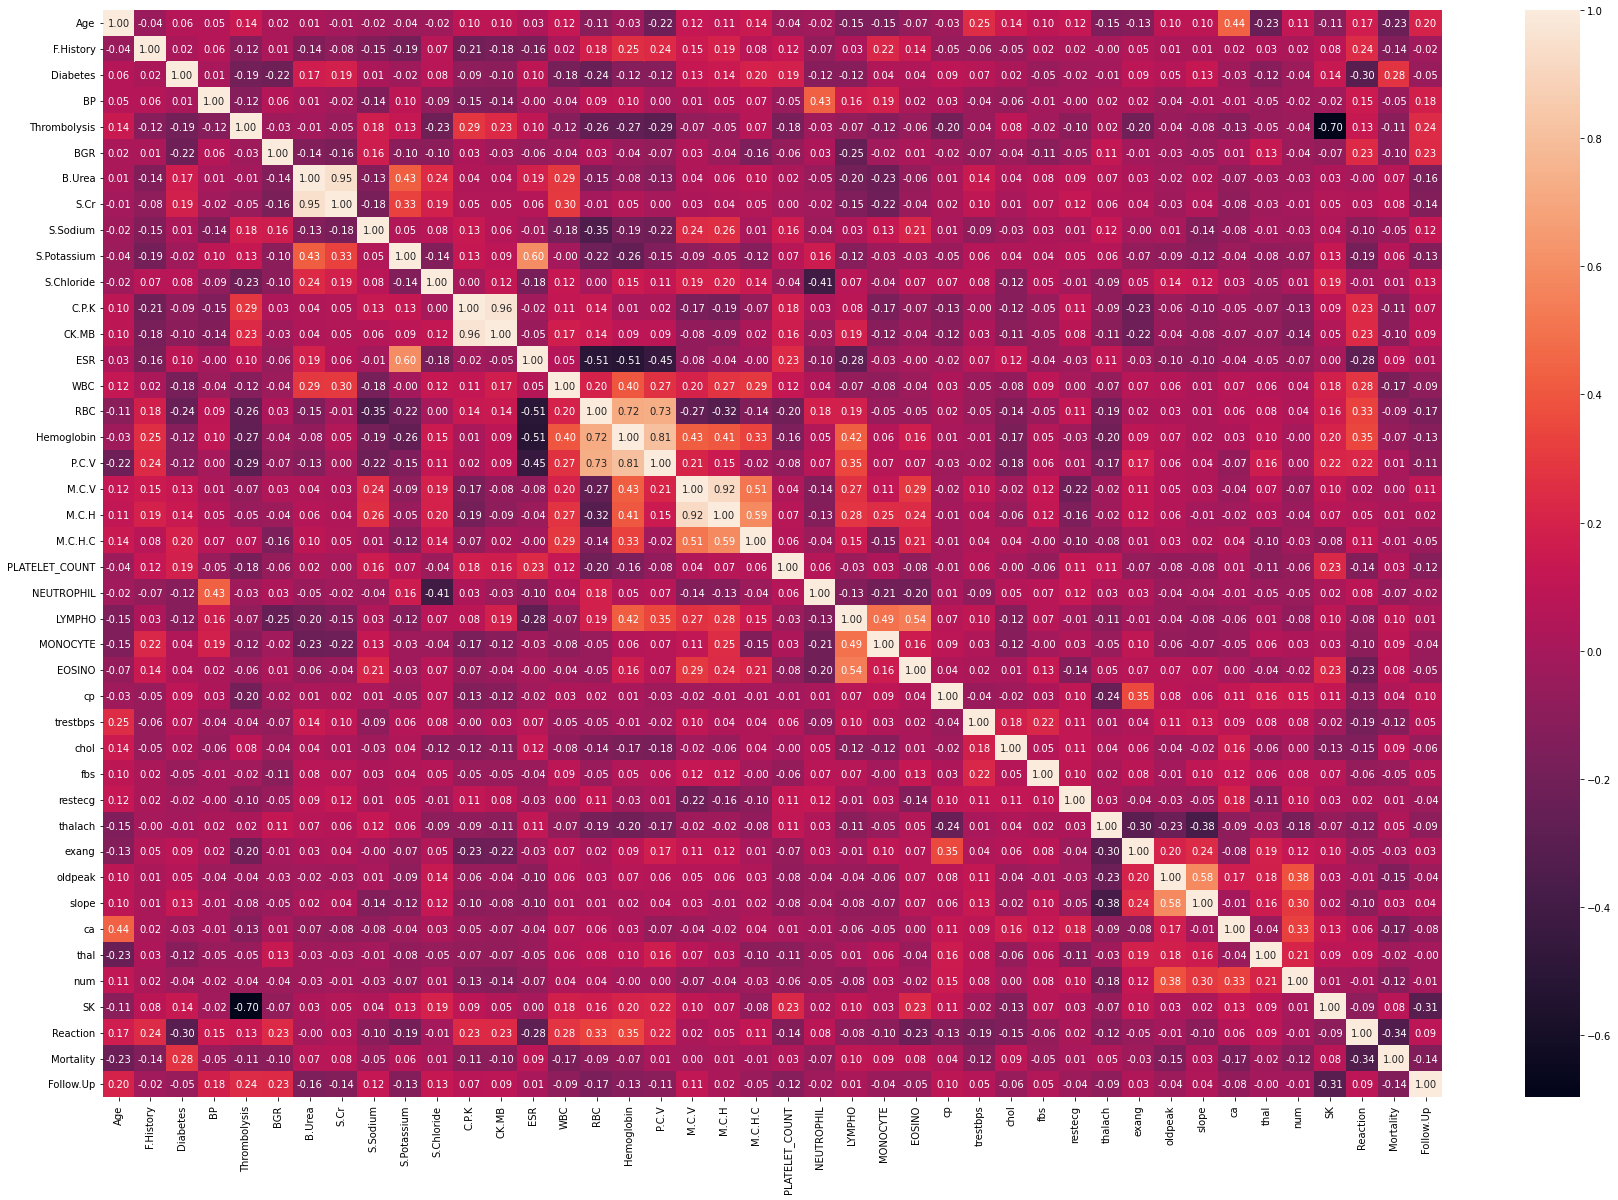

In [ ]:
plt.figure(figsize=(30,20))
corr = dados.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

- 44% de (CA) tem relação com a idade e 25% trestbps também tem realção com a idade
- 43% de NEUTROPHIL tem relação com (BP)
- HEMOGLOBIN:
  - tem forte relação com P.V.C de 81%
  - Lympho tem 42%
  - M.C.H.C 33%
  - M.C.H tem 41%
  - M.C.V tem 43%
  - RBC tem 72%
  - WBC tem 40%
- LYMPHO:
    - Hemoglobin 42%
    - 35% P.C.V
    - 27% M.C.V
    - 28% M.C.H
    - 49% MONOCYTE
    - 54% EOSINO
- NUM:
  - 38% oldpeak
  - 30% slope
  - 33% CA
- M.C.V:
  - 29% Eosino
  - 52% M.C.H.C
  - 92% M.C.H
  

### Relação da idade de gênero por '-Hemoglobin', -'LYMPHO', -'M.C.V', -'M.C.H', -'M.C.H.C',-'P.C.V',-'RBC',-'WBC',-'S.Chloride',-'S.Potassium', -'S.Sodium', -'PLATELET_COUNT'

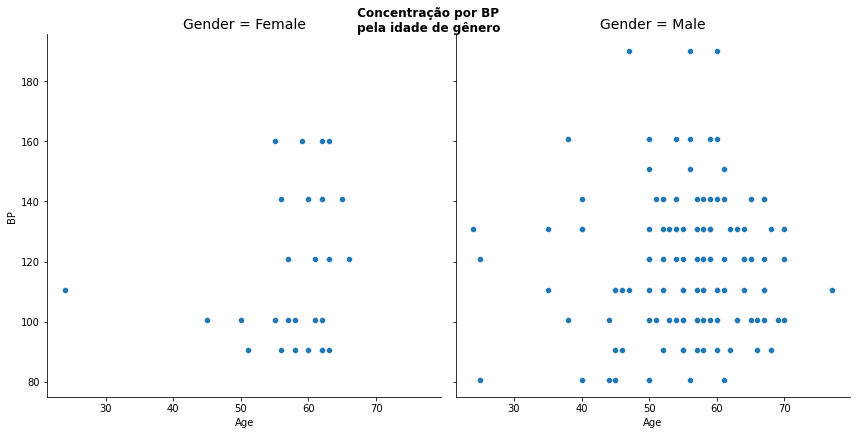

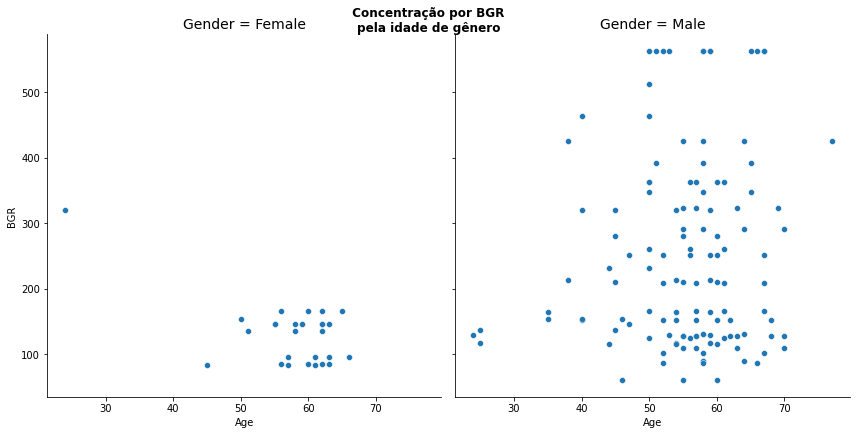

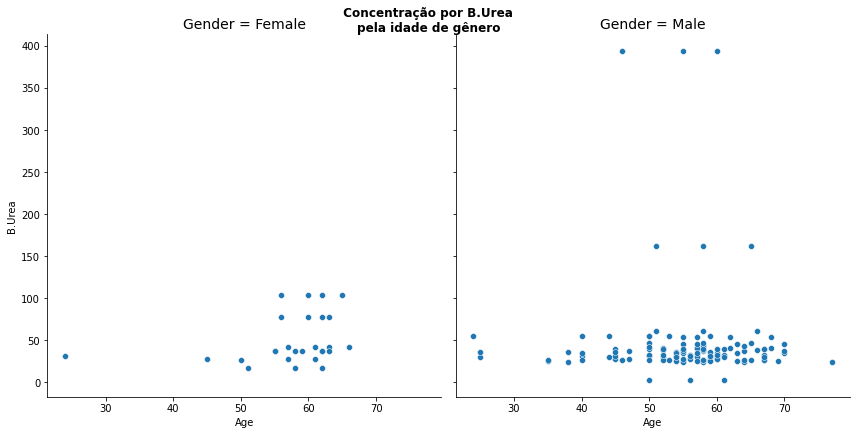

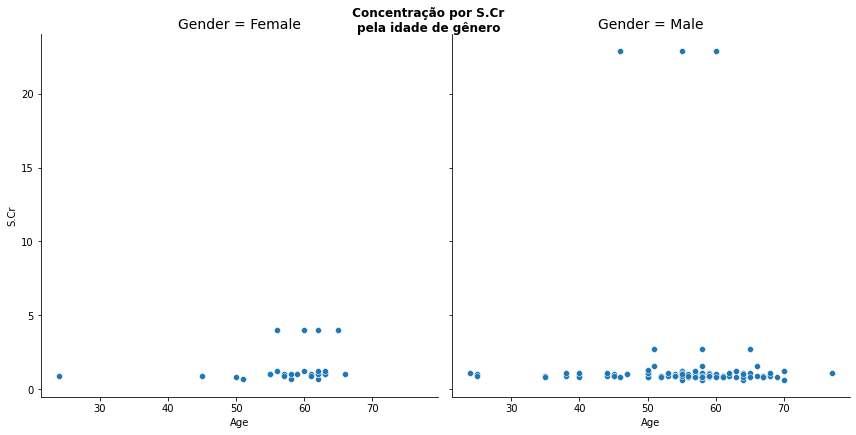

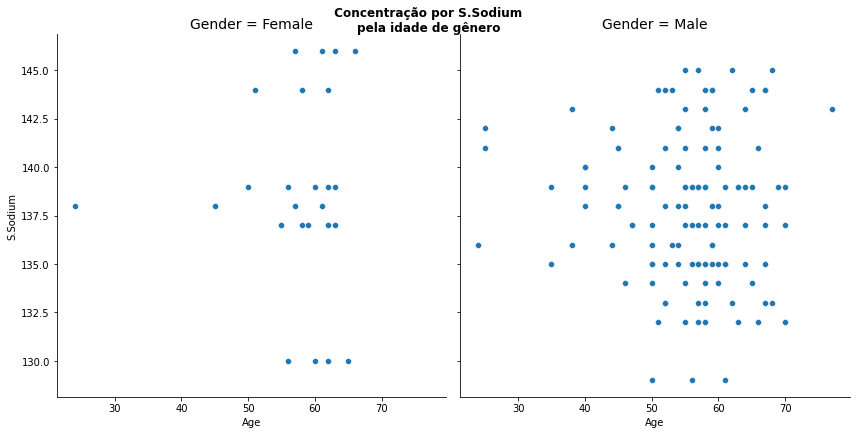

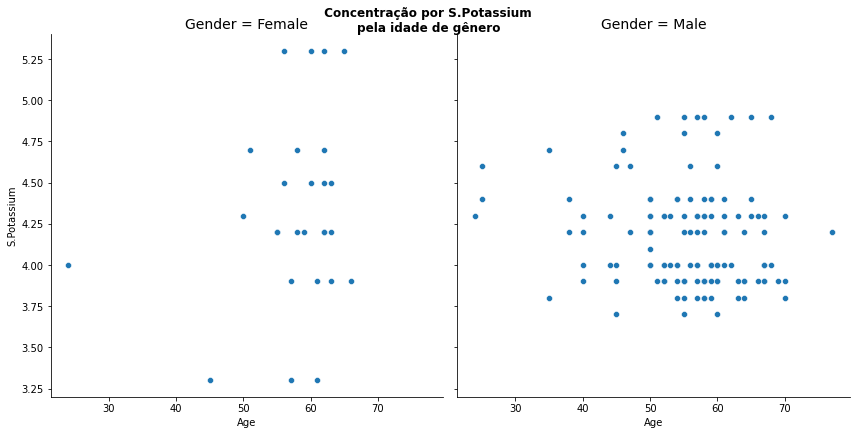

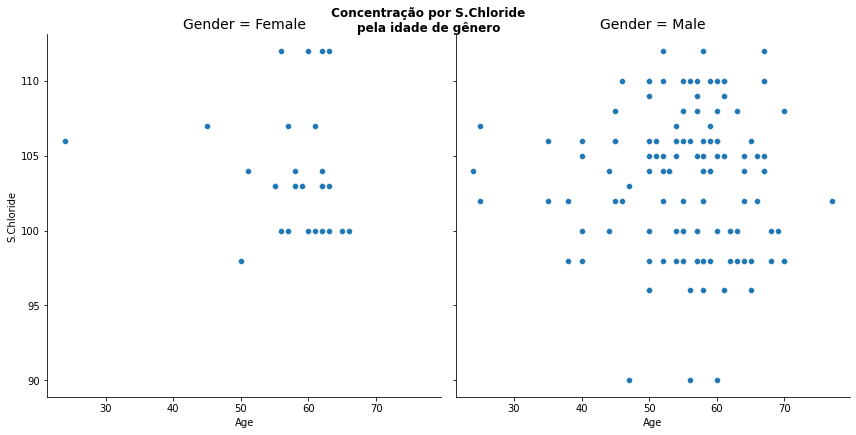

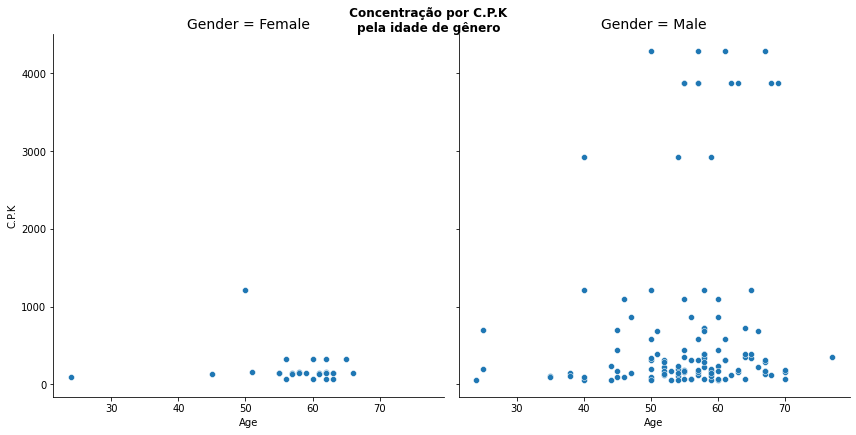

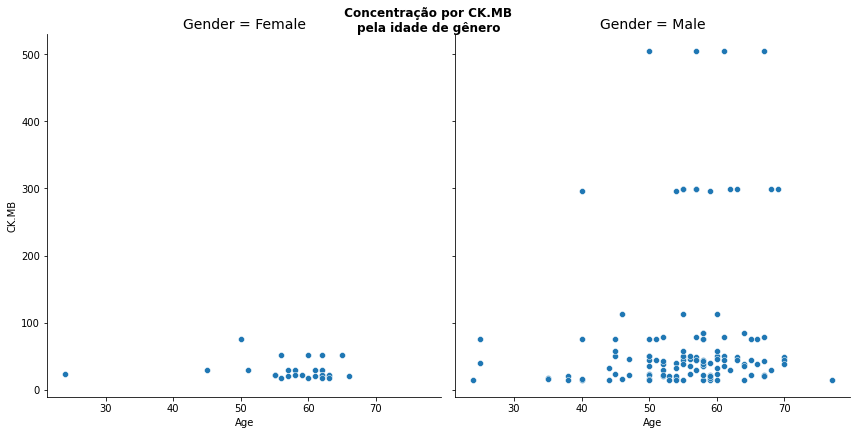

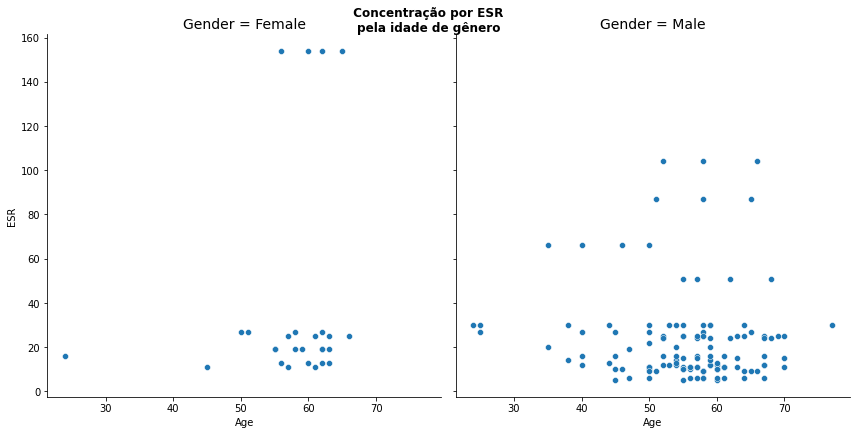

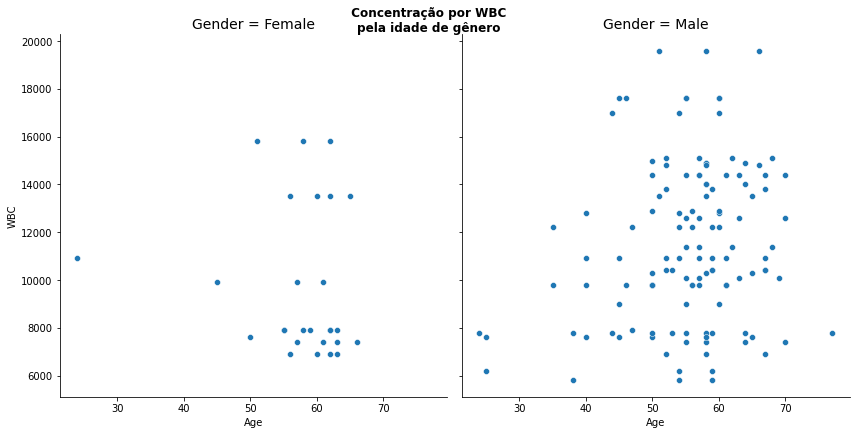

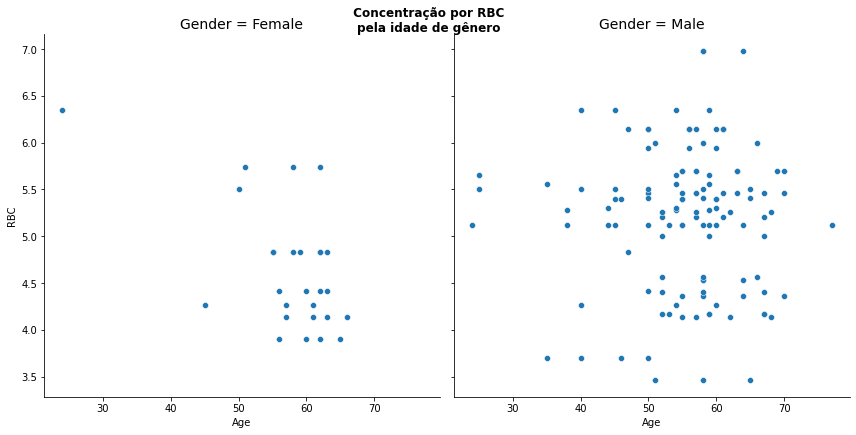

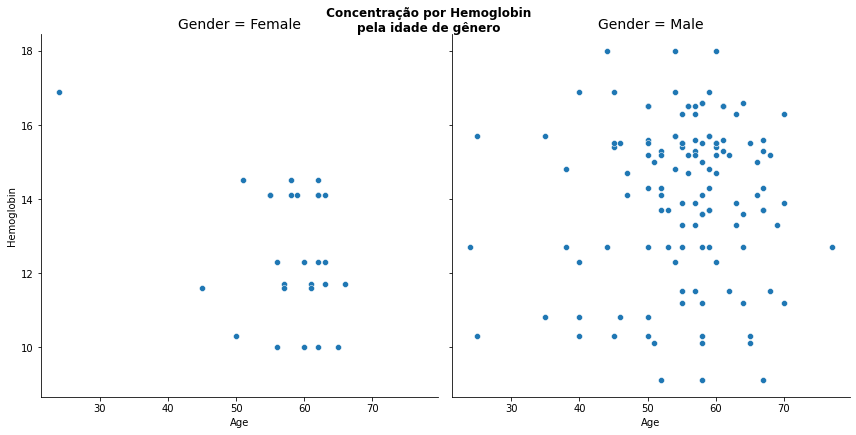

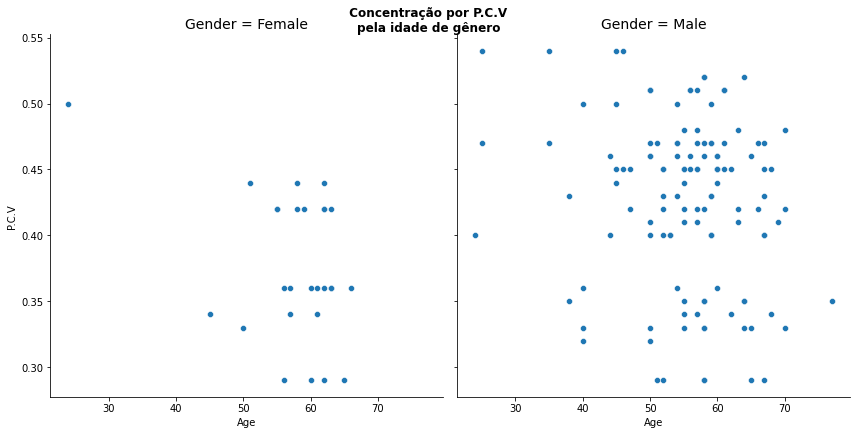

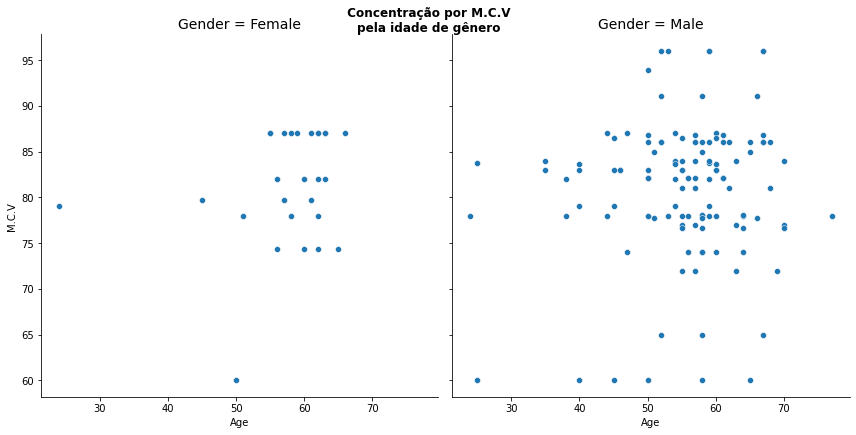

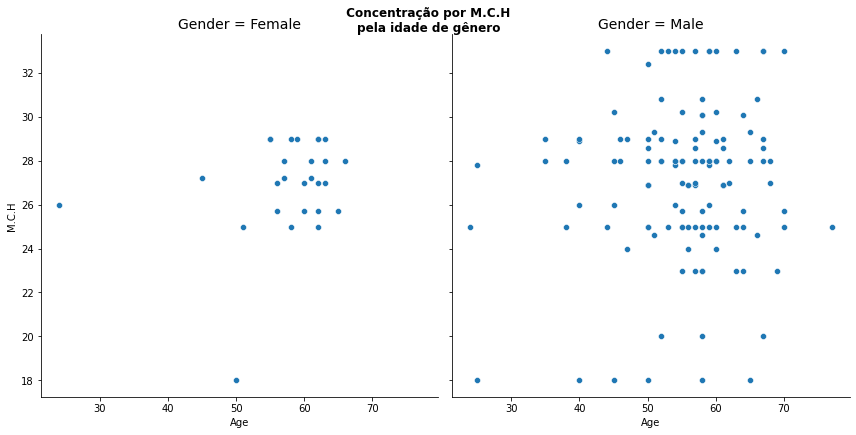

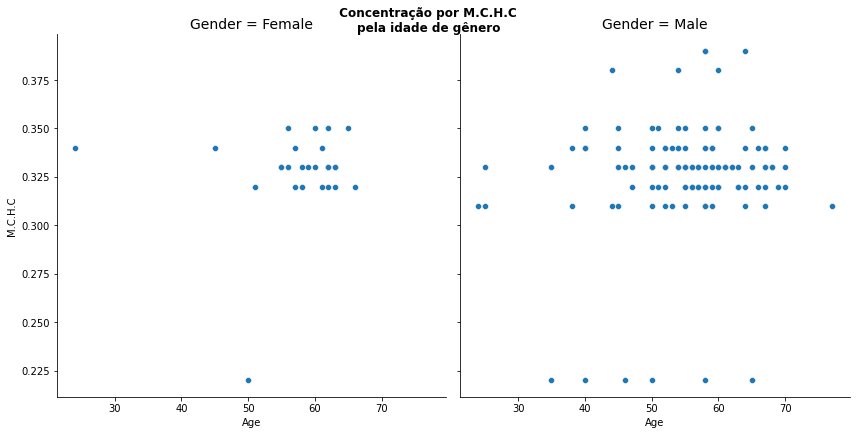

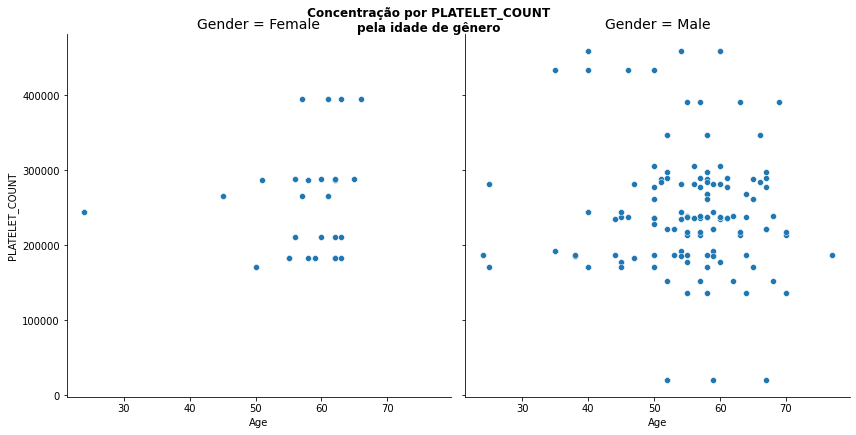

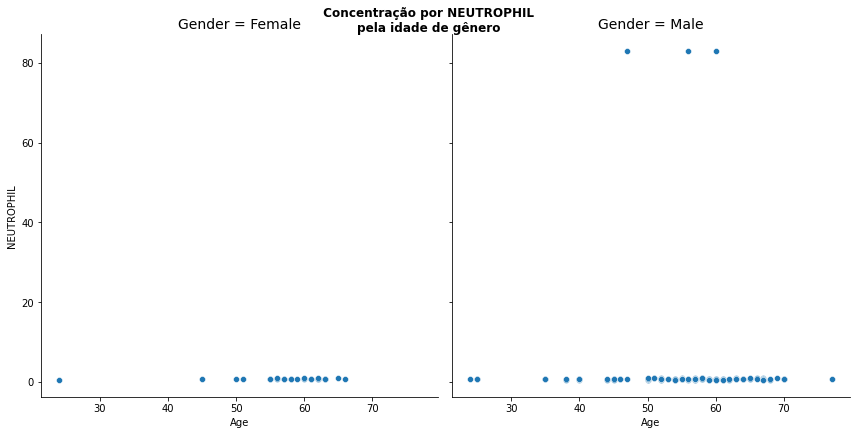

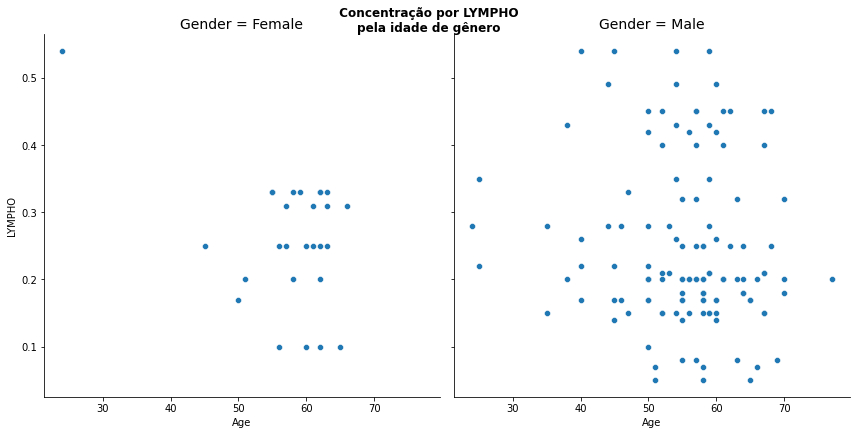

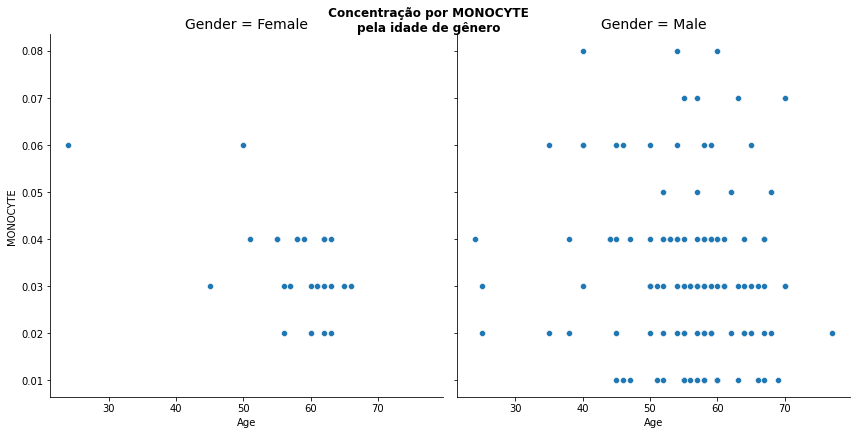

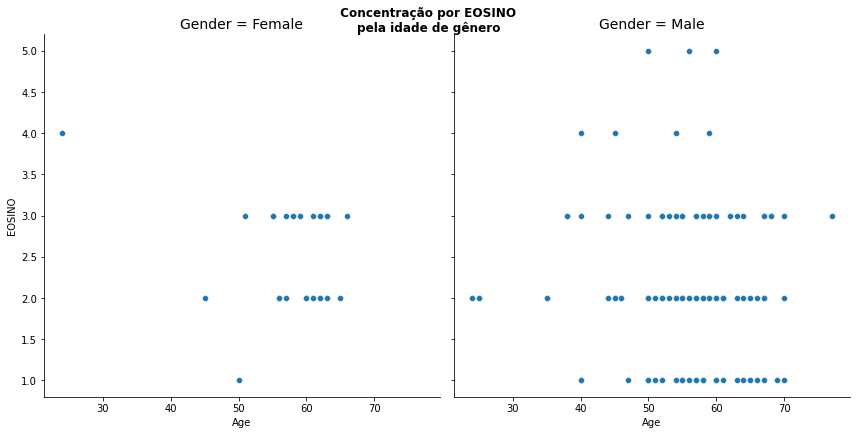

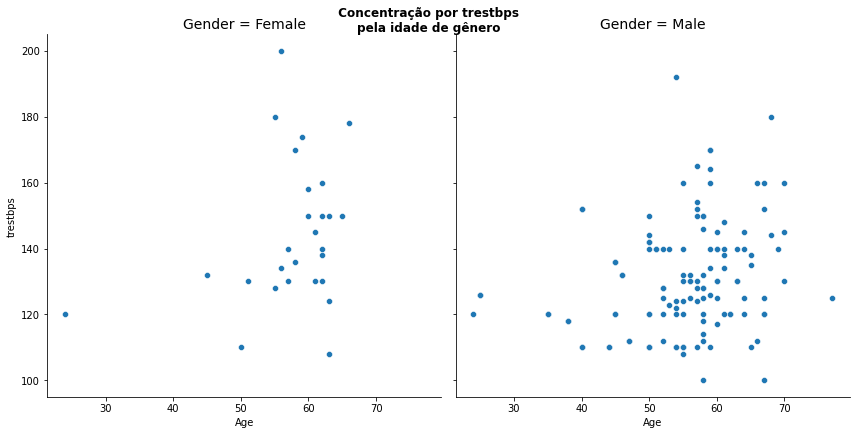

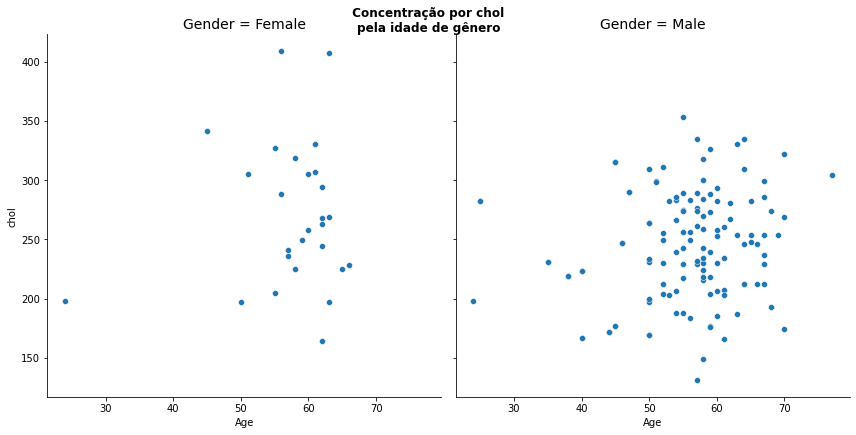

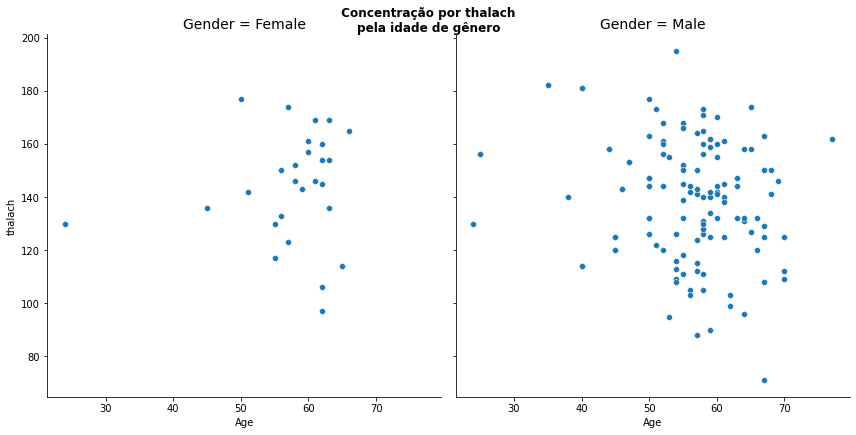

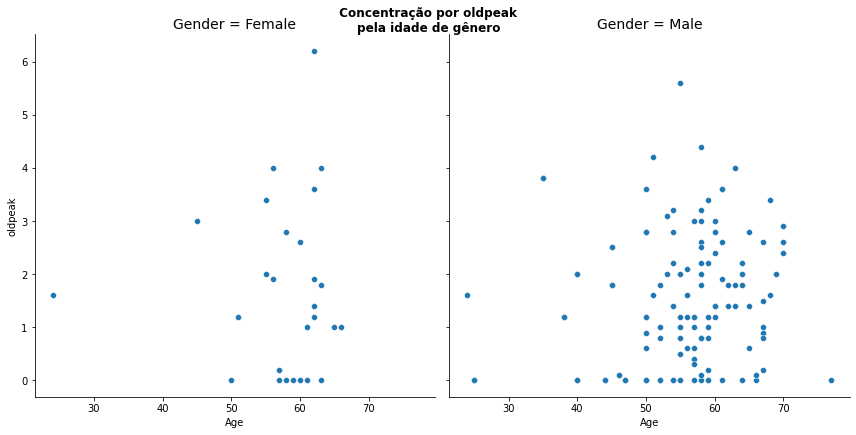

In [ ]:
colunas = ['BP','BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO','trestbps', 'chol','thalach','oldpeak']
for col in colunas:
  g = sns.FacetGrid(dados,col='Gender',height=6)
  g.map_dataframe(sns.scatterplot, x='Age',y=col)
  g.set_titles(size=14)
  plt.suptitle(f' Concentração por {col} \npela idade de gênero',fontweight='bold',y=1.0)
  print()
  print()
  plt.tight_layout()
  plt.show()

### Relação de Lympho com 'EOSINO', 'P.C.V', 'M.C.H', 'M.C.V'

<Figure size 720x720 with 0 Axes>

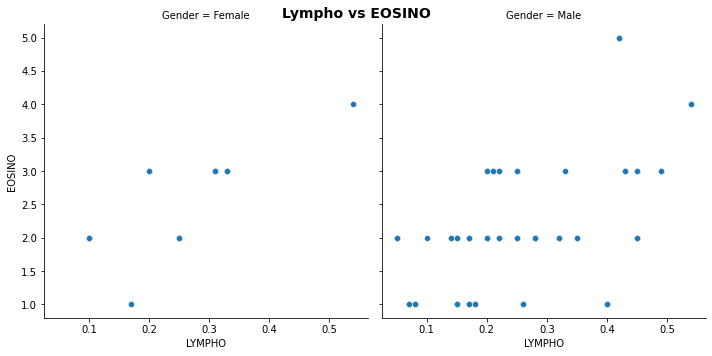

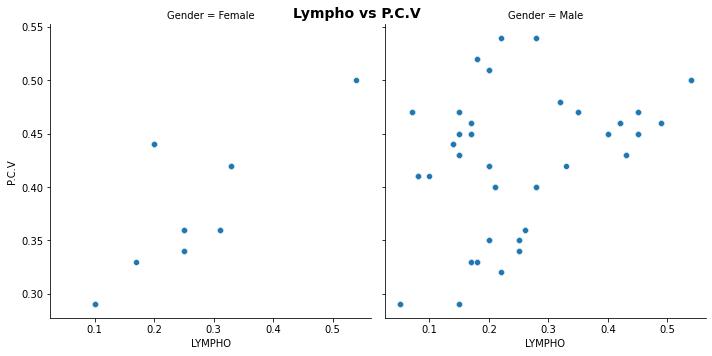

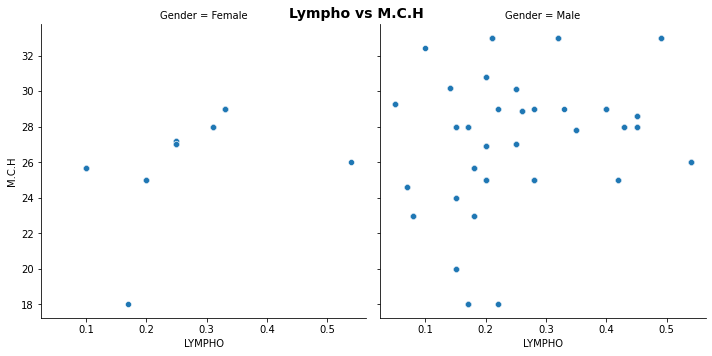

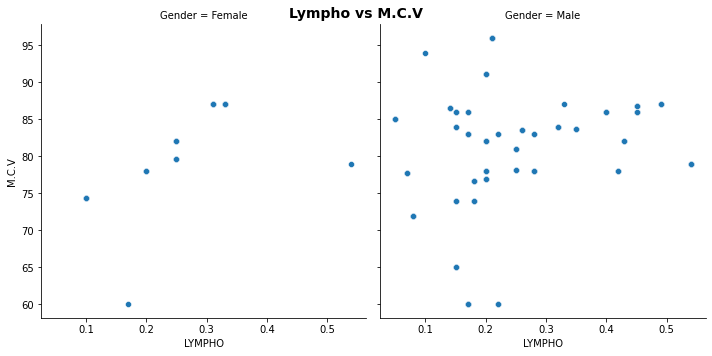

In [ ]:
# relação da coluna Lympho
colunas = ['EOSINO','P.C.V','M.C.H','M.C.V']
plt.figure(figsize=(10,10))
for i,col in enumerate(colunas):
  g = sns.FacetGrid(dados, col='Gender',height=5)
  g.map_dataframe(sns.scatterplot, x='LYMPHO',y=col)
  plt.suptitle(f'Lympho vs {col}', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Relação de Idade com 'EOSINO', 'P.C.V', 'M.C.H', 'M.C.V'

<Figure size 720x720 with 0 Axes>

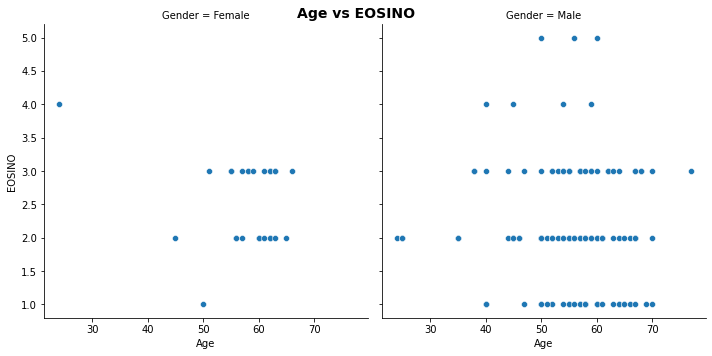

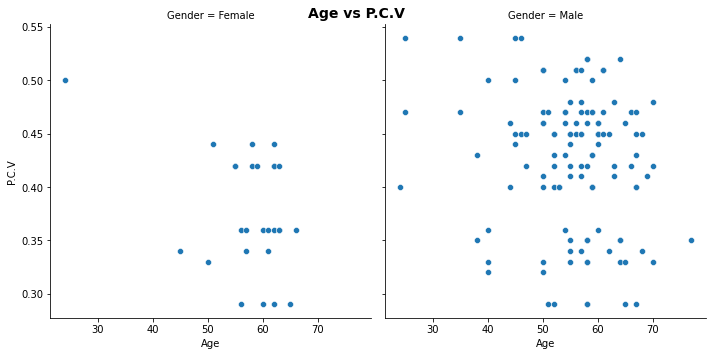

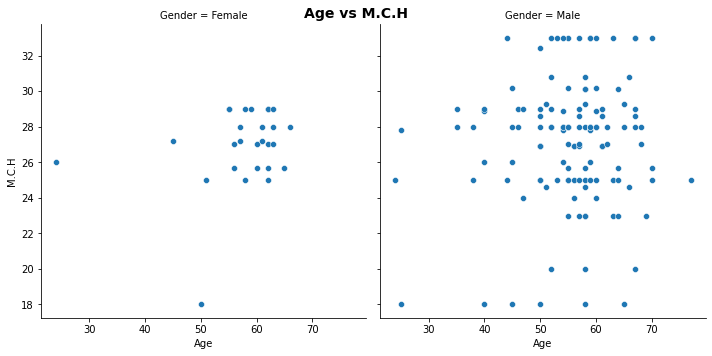

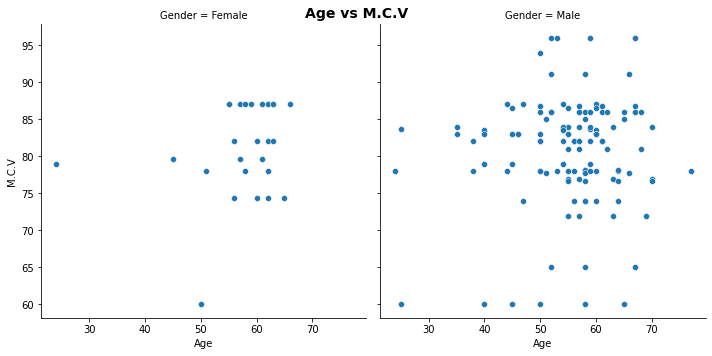

In [ ]:
# relação da coluna Age
colunas = ['EOSINO','P.C.V','M.C.H','M.C.V']
plt.figure(figsize=(10,10))
for i,col in enumerate(colunas):
  g = sns.FacetGrid(dados, col='Gender',height=5)
  g.map_dataframe(sns.scatterplot, x='Age',y=col)
  plt.suptitle(f'Age vs {col}', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

### Relação de Hemoglobina com P.C.V', 'LYMPHO', 'M.C.H.C', 'M.C.H', 'M.C.V', 'RBC', 'WBC'


<Figure size 720x1440 with 0 Axes>

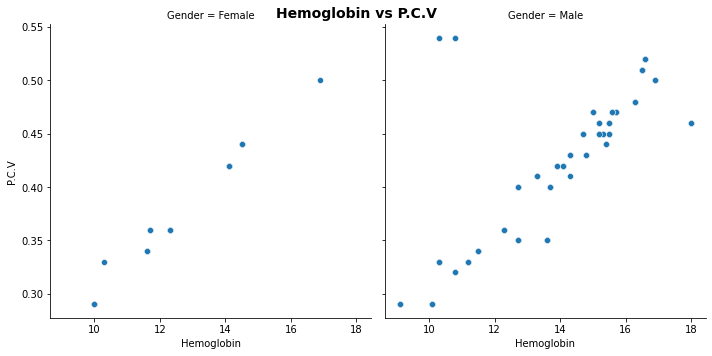

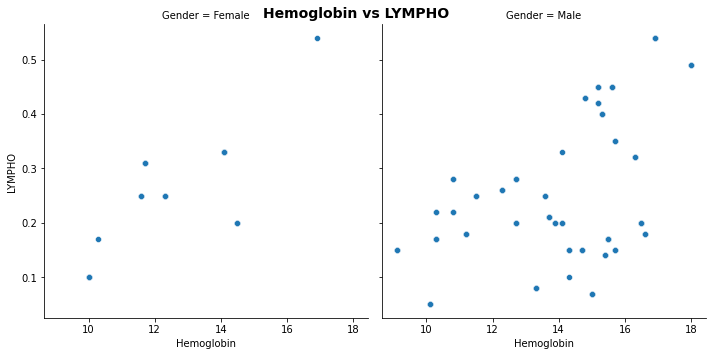

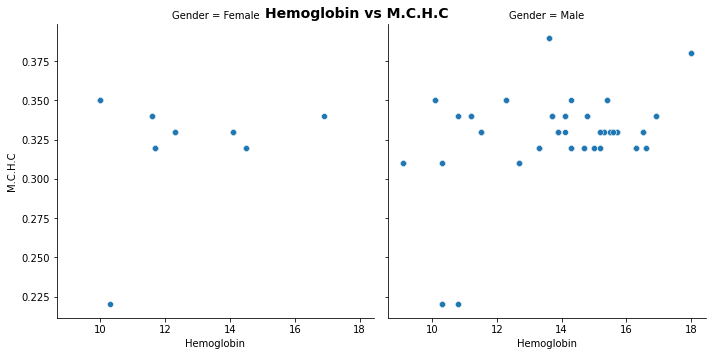

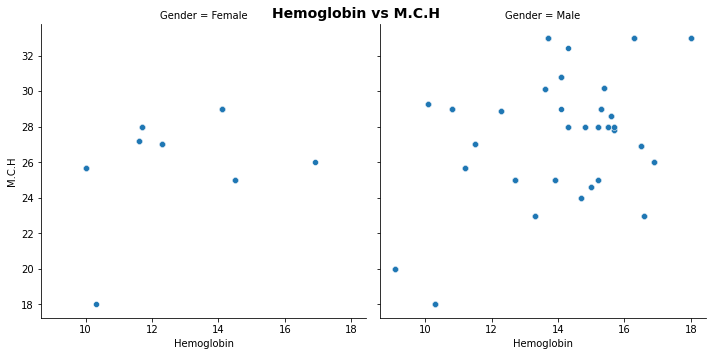

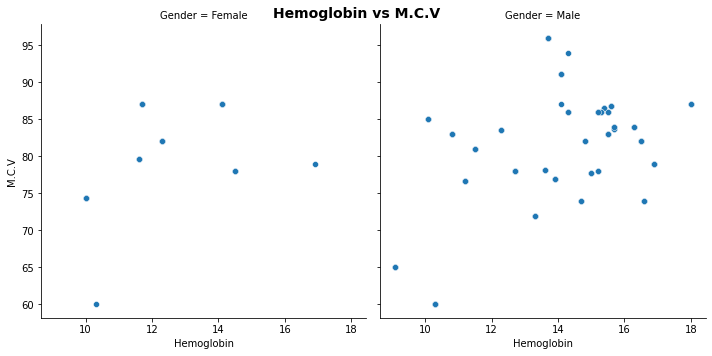

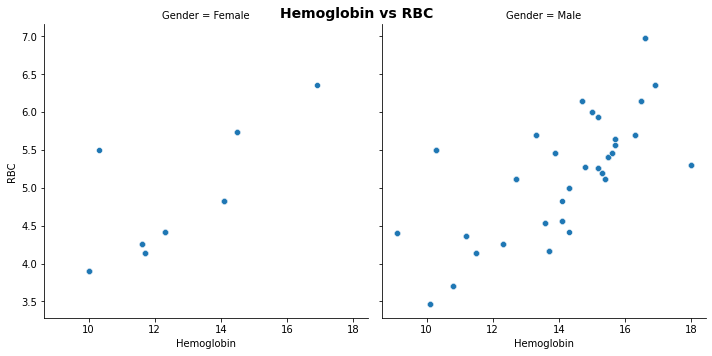

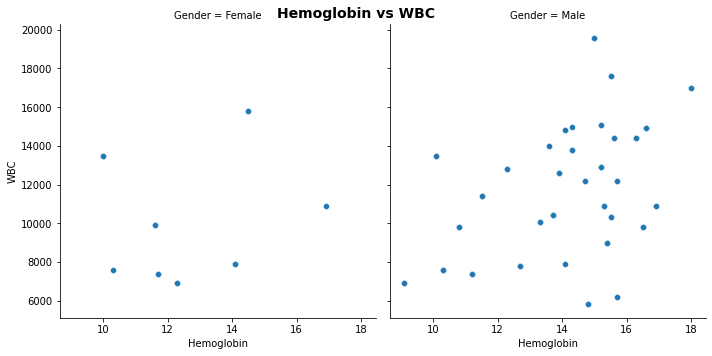

In [ ]:
# relação com a coluna hemoglobin
colunas = ['P.C.V','LYMPHO','M.C.H.C','M.C.H','M.C.V','RBC','WBC']
plt.figure(figsize=(10,20))
for i,col in enumerate(colunas):
   g = sns.FacetGrid(dados, col='Gender',height=5)
   g.map_dataframe(sns.scatterplot, x='Hemoglobin',y=col)
   plt.suptitle(f'Hemoglobin vs {col}', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Relação da Hemoglobina com 'P.C.V', 'LYMPHO', 'M.C.H.C', 'M.C.H', 'M.C.V', 'RBC', 'WBC'

<Figure size 720x1440 with 0 Axes>

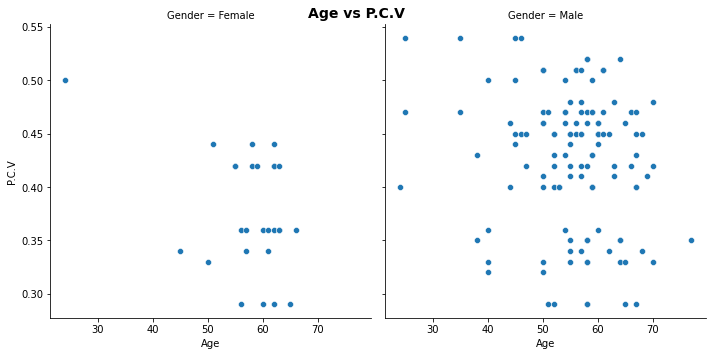

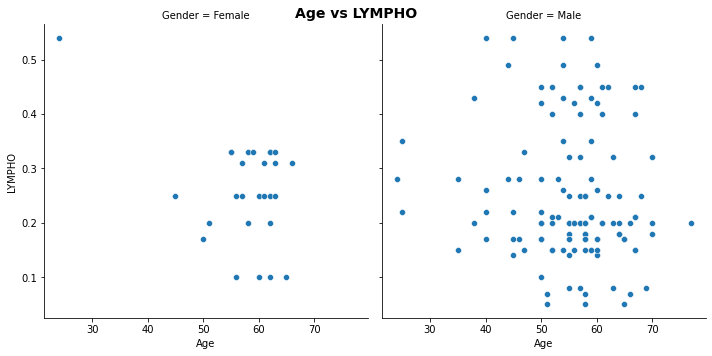

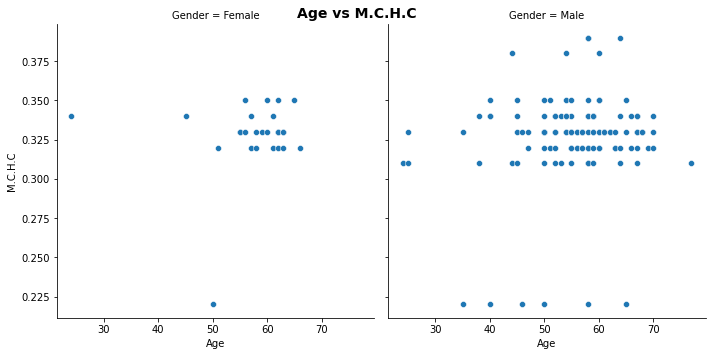

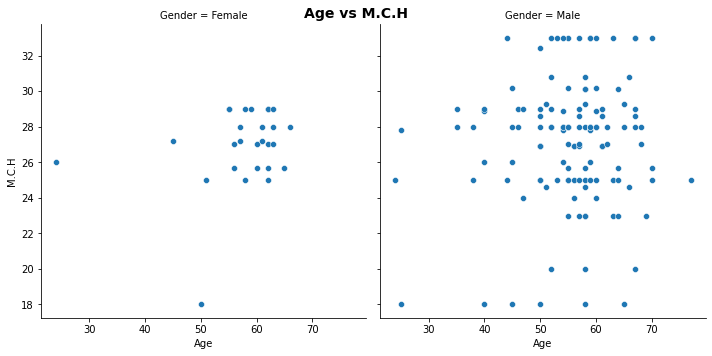

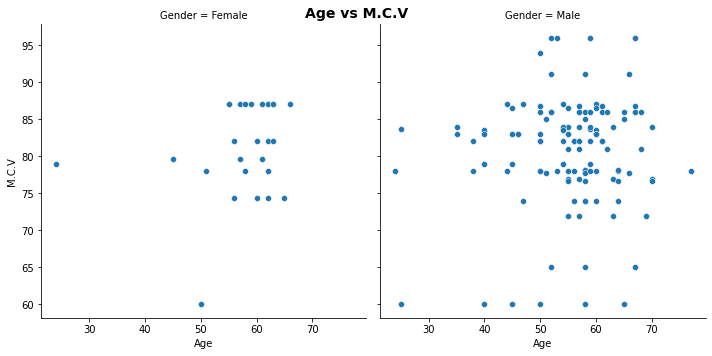

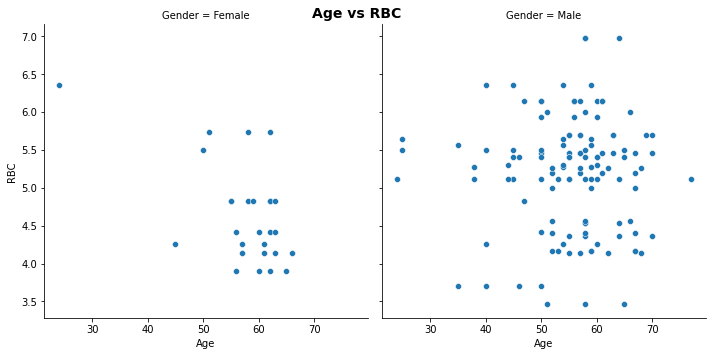

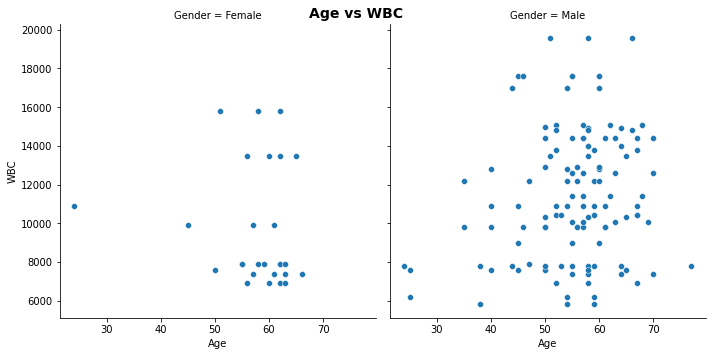

In [ ]:
# relação com a coluna hemoglobin
colunas = ['P.C.V','LYMPHO','M.C.H.C','M.C.H','M.C.V','RBC','WBC']
plt.figure(figsize=(10,20))
for i,col in enumerate(colunas):
   g = sns.FacetGrid(dados, col='Gender',height=5)
   g.map_dataframe(sns.scatterplot, x='Age',y=col)
   plt.suptitle(f'Age vs {col}', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

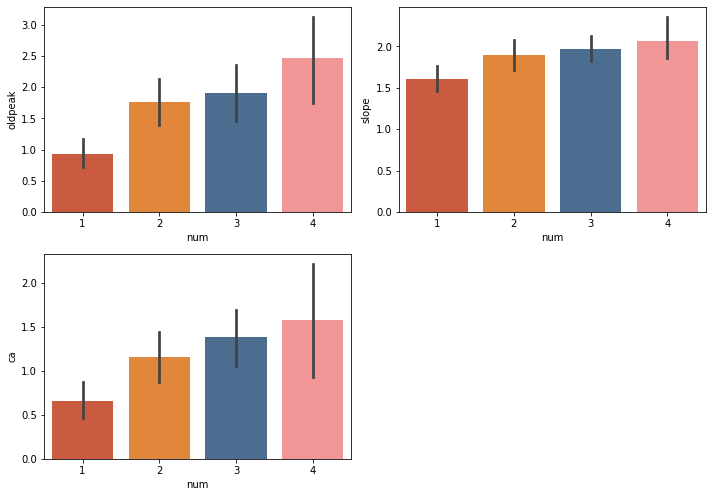

In [ ]:
# relação com a coluna num
colunas = ['oldpeak','slope','ca']
plt.figure(figsize=(10,10))
for i,col in enumerate(colunas):
  ax = plt.subplot(3,2,i+1)
  sns.barplot(x=dados['num'], y=dados[col],palette=color)
plt.tight_layout()
plt.show()

In [ ]:
dados.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality', 'Marital status',
       'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

### Relação de Eosino com Lympho, M.C.V

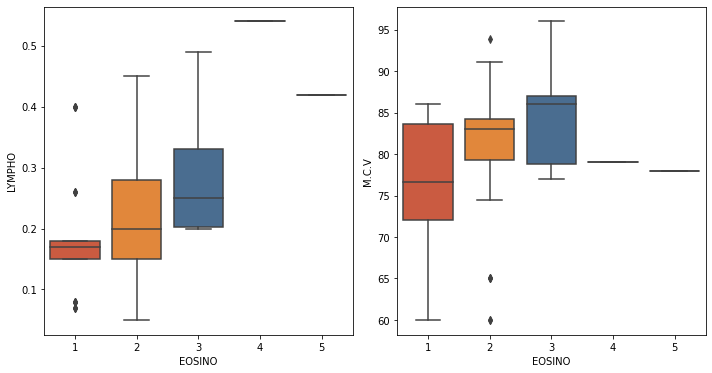

In [ ]:
# relação com a coluna eosino
colunas = ['LYMPHO','M.C.V']
plt.figure(figsize=(10,10))
for i,col in enumerate(colunas):
  ax = plt.subplot(2,2,i+1)
  sns.boxplot(x=dados['EOSINO'],y=dados[col], palette=color)
plt.tight_layout()
plt.show()

### Distribuição das colunas numéricas

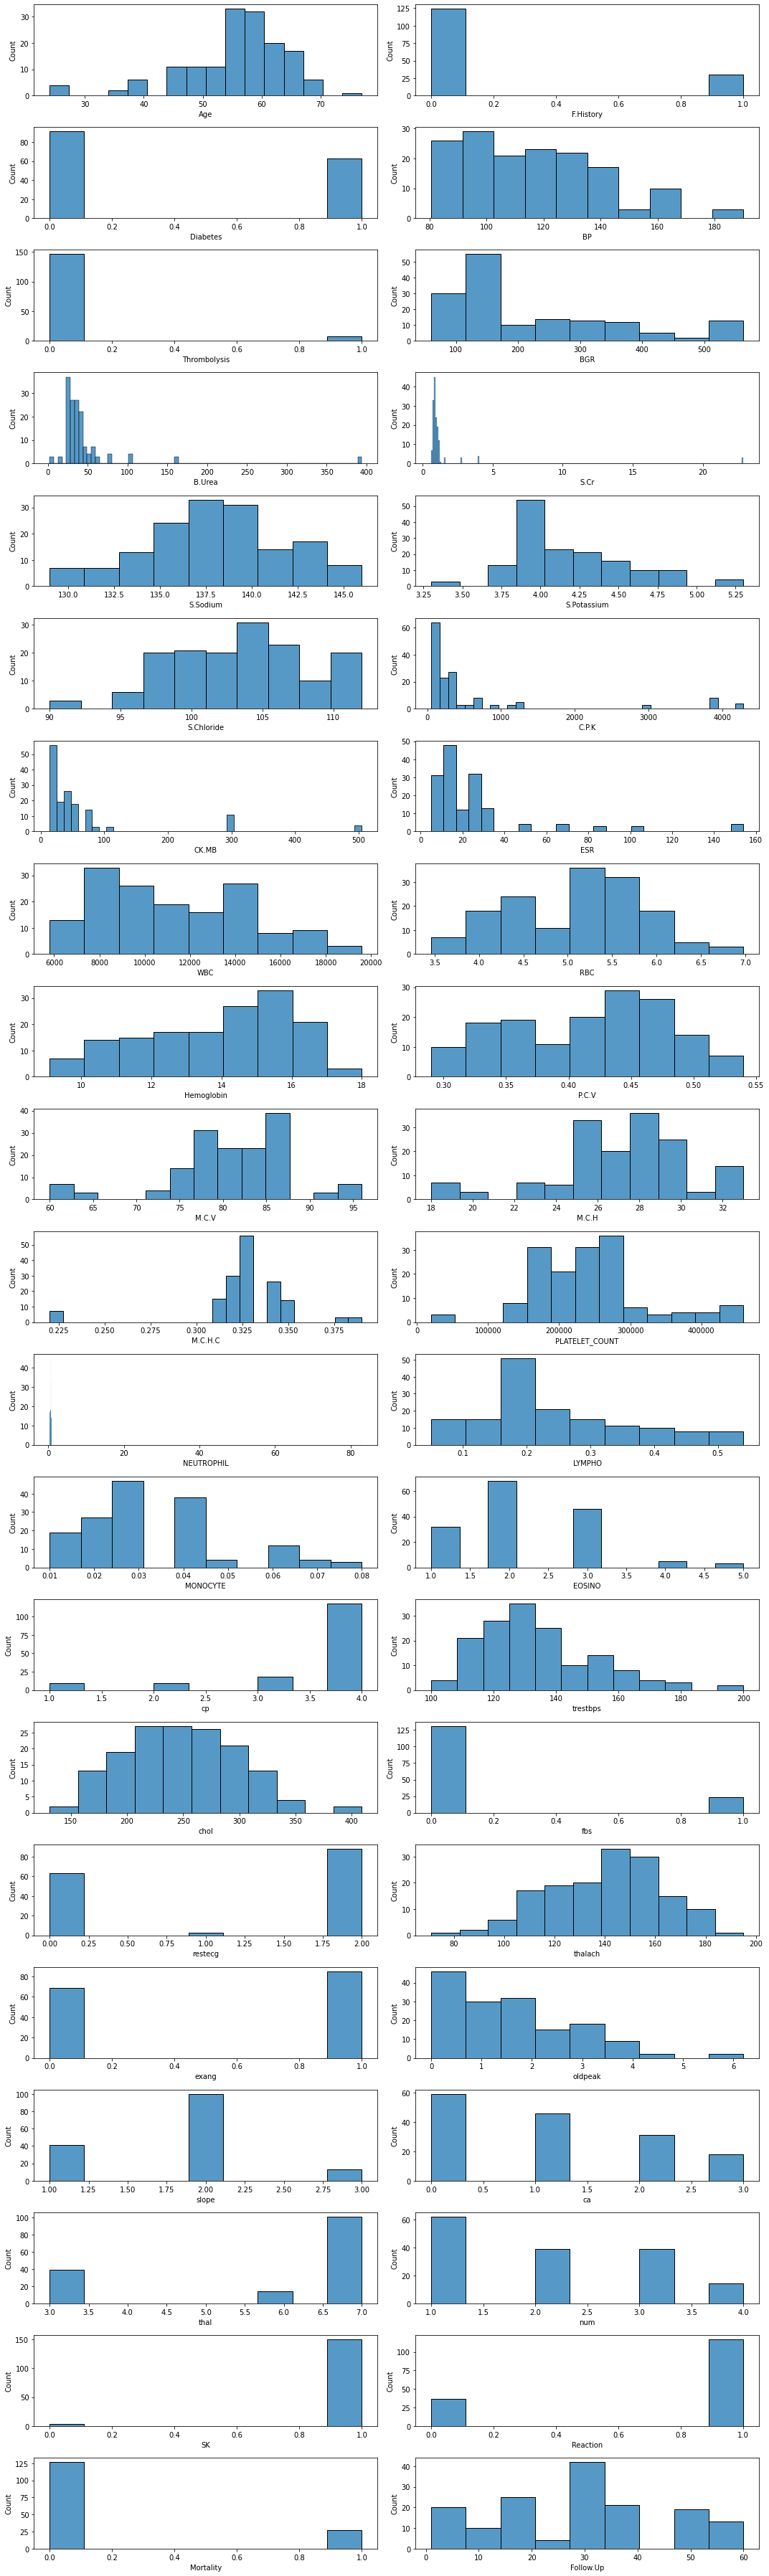

In [ ]:
# Visualizando no gráfico as dados númericos 
num = dados.select_dtypes(exclude='O')

## gráfico de histograma
plt.figure(figsize=(15,50))
for i, col in enumerate(num.columns):
        ax = plt.subplot(21, 2, i+1)
        sns.histplot(num[col], ax=ax)
        plt.xlabel(col)
plt.tight_layout()        
plt.show()

- Visualizando o gráfico de histograma nos dados numéricos, podemos ver o  desequilibrio de dados nas colunas 'Mortality', 'Reaction', 'SK', 'F.History','Thrombolysis','fbs'.

### Boxplot das colunas numéricas

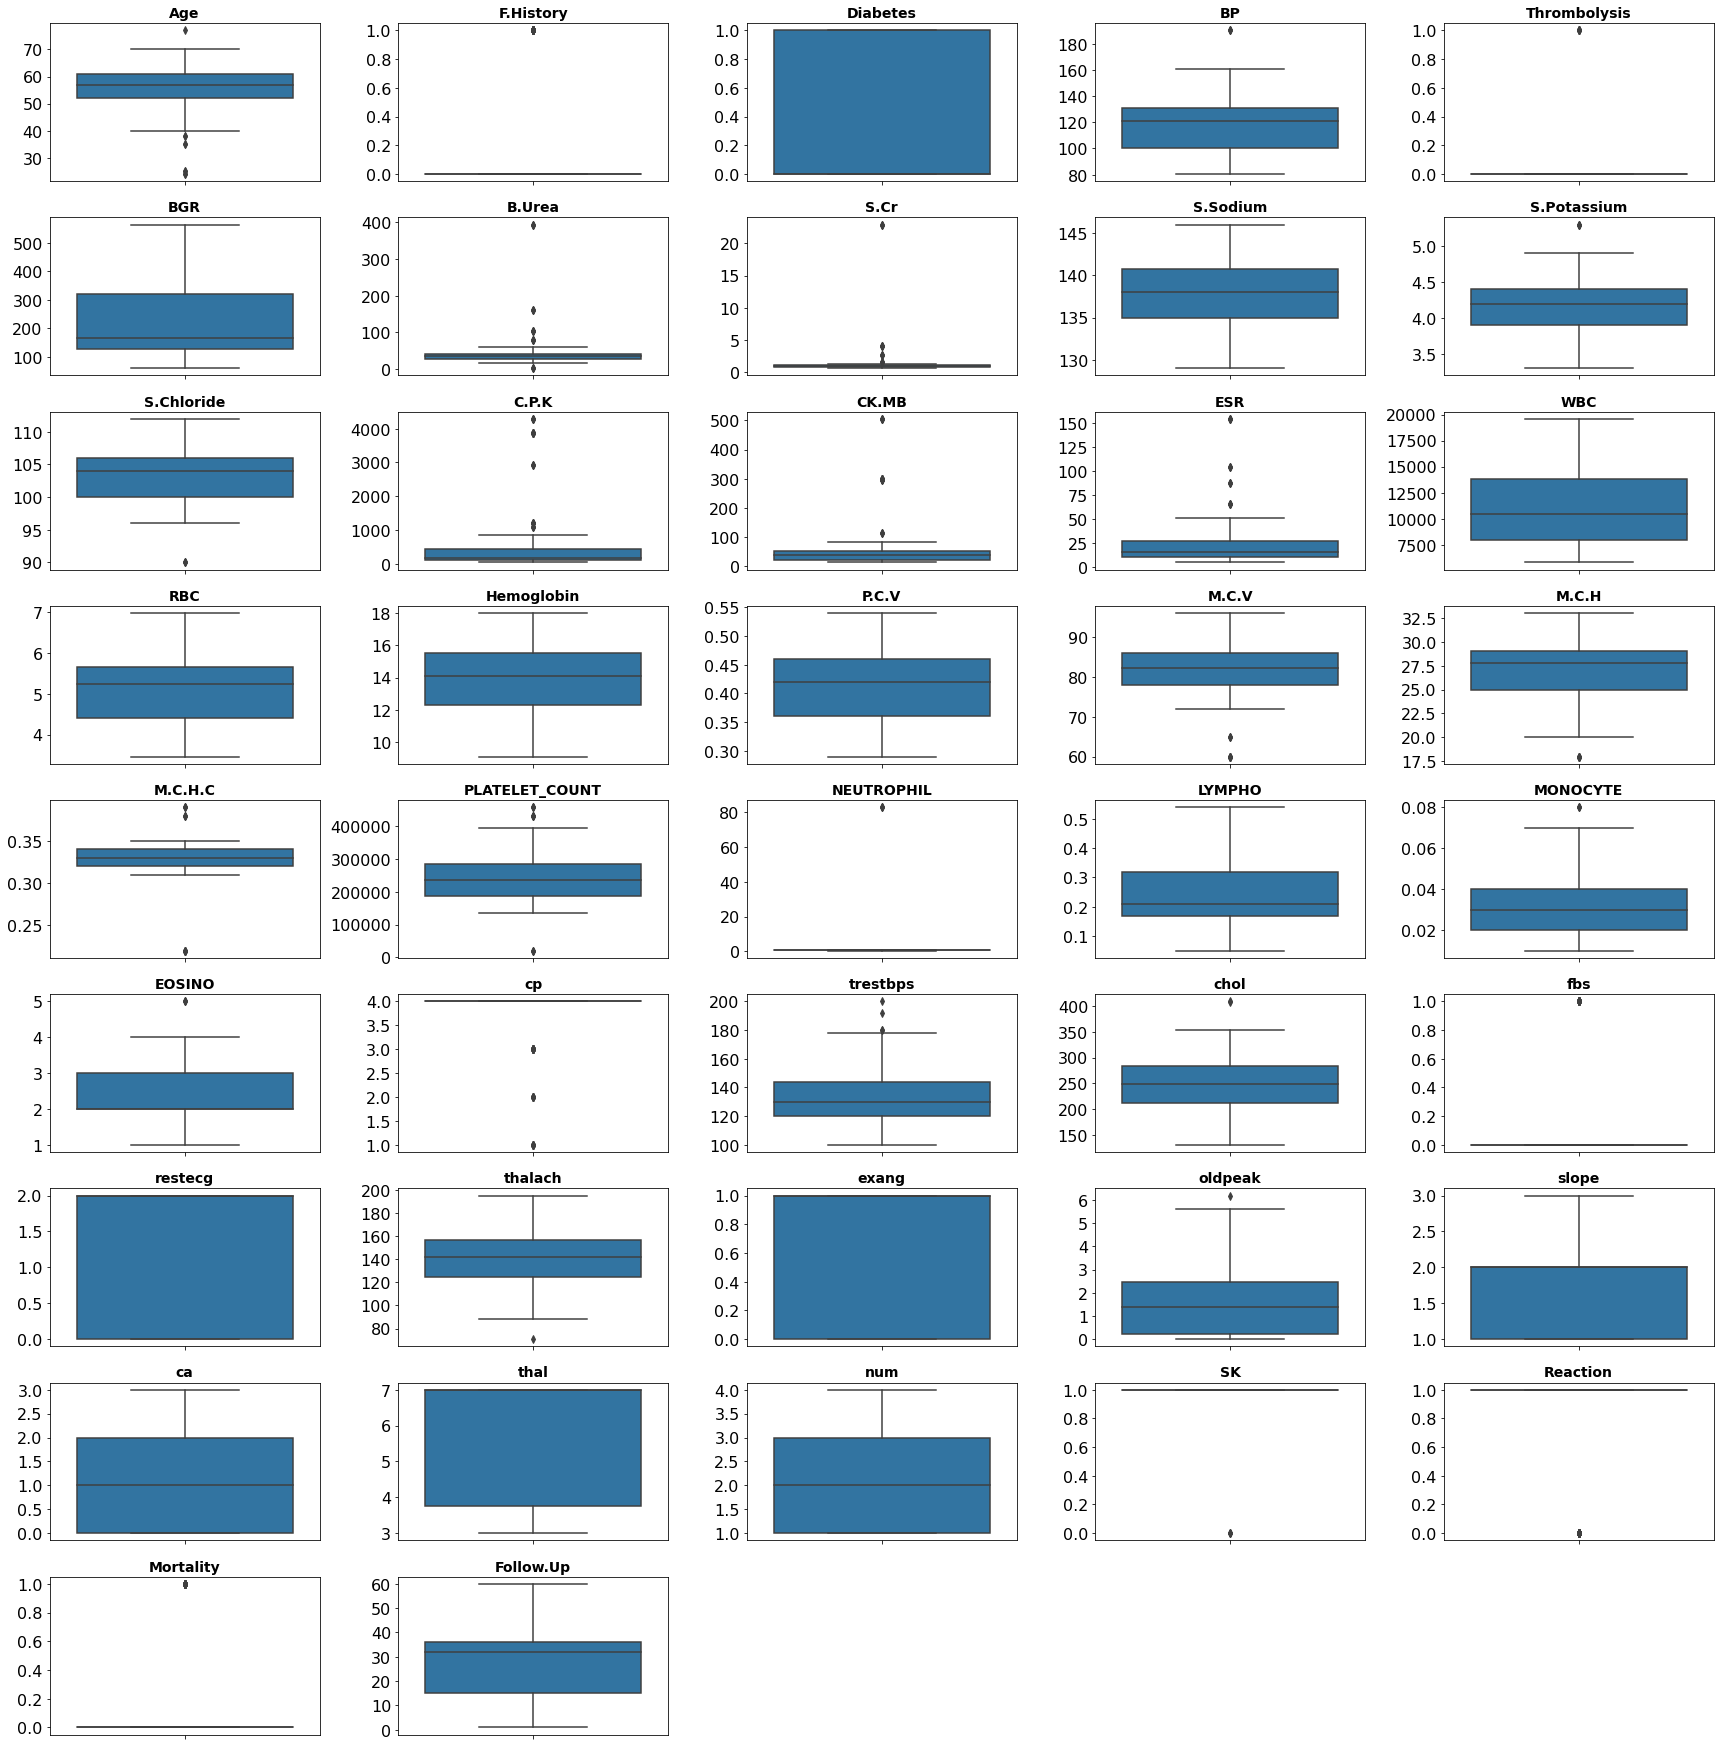

In [ ]:
num = dados.select_dtypes(exclude='O')

# gráfico Box 
plt.figure(figsize=(24,27))
for i,col in enumerate(num):
 
  ax = plt.subplot(10, 5, i+1)
  sns.boxplot(y=num[col])
  plt.title(col, fontsize=14, fontweight='bold')
  plt.yticks(fontsize=16)
  plt.ylabel(None)
plt.tight_layout()
plt.show()

- Verificando a relação do grupo de idade com outras colunas.



### Relação do grupo de idade com as colunas

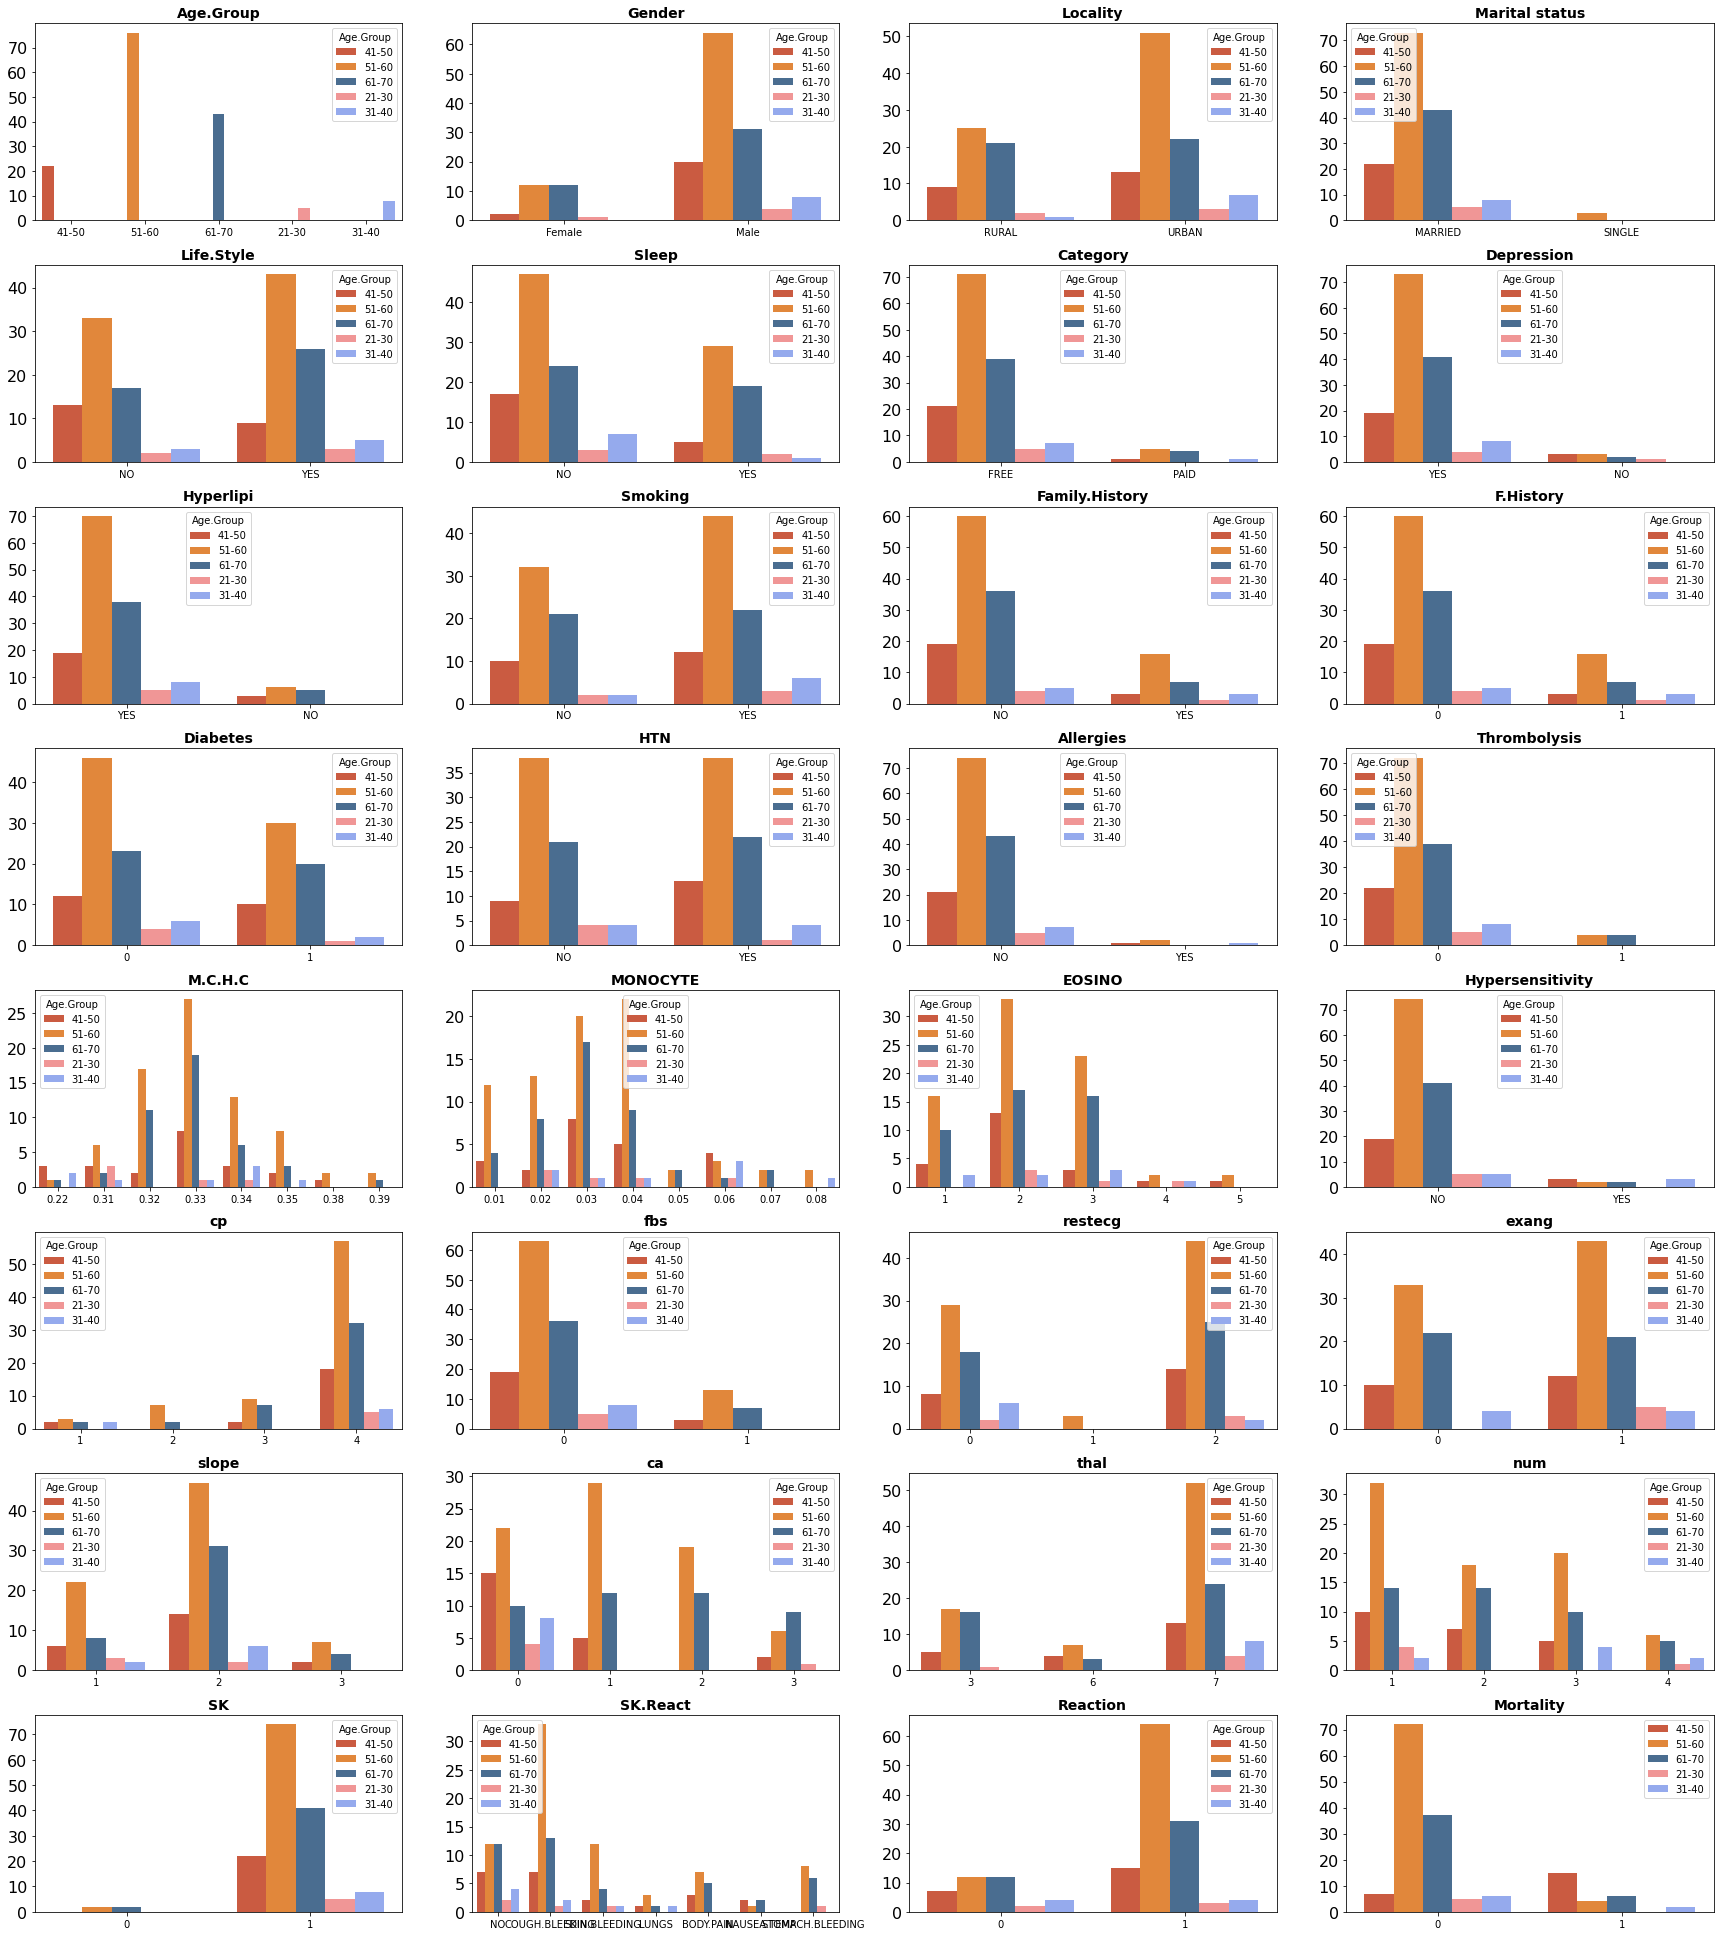

In [ ]:
colunas = ['Age.Group','Gender','Locality',  'Marital status','Life.Style' ,                                                                           
'Sleep','Category','Depression','Hyperlipi','Smoking','Family.History',
'F.History','Diabetes','HTN','Allergies','Thrombolysis','M.C.H.C',
'MONOCYTE','EOSINO','Hypersensitivity','cp','fbs','restecg','exang',
'slope','ca','thal','num','SK','SK.React','Reaction','Mortality']


plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
  ax = plt.subplot(8,4,i+1)
  sns.countplot(x=dados[col], hue=dados['Age.Group'], ax=ax,palette=color)
  plt.title(col, fontsize=14, fontweight='bold')
  plt.yticks(fontsize=16)
  plt.ylabel(None)
  plt.xlabel(None)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Relação de mortalidade com outras colunas

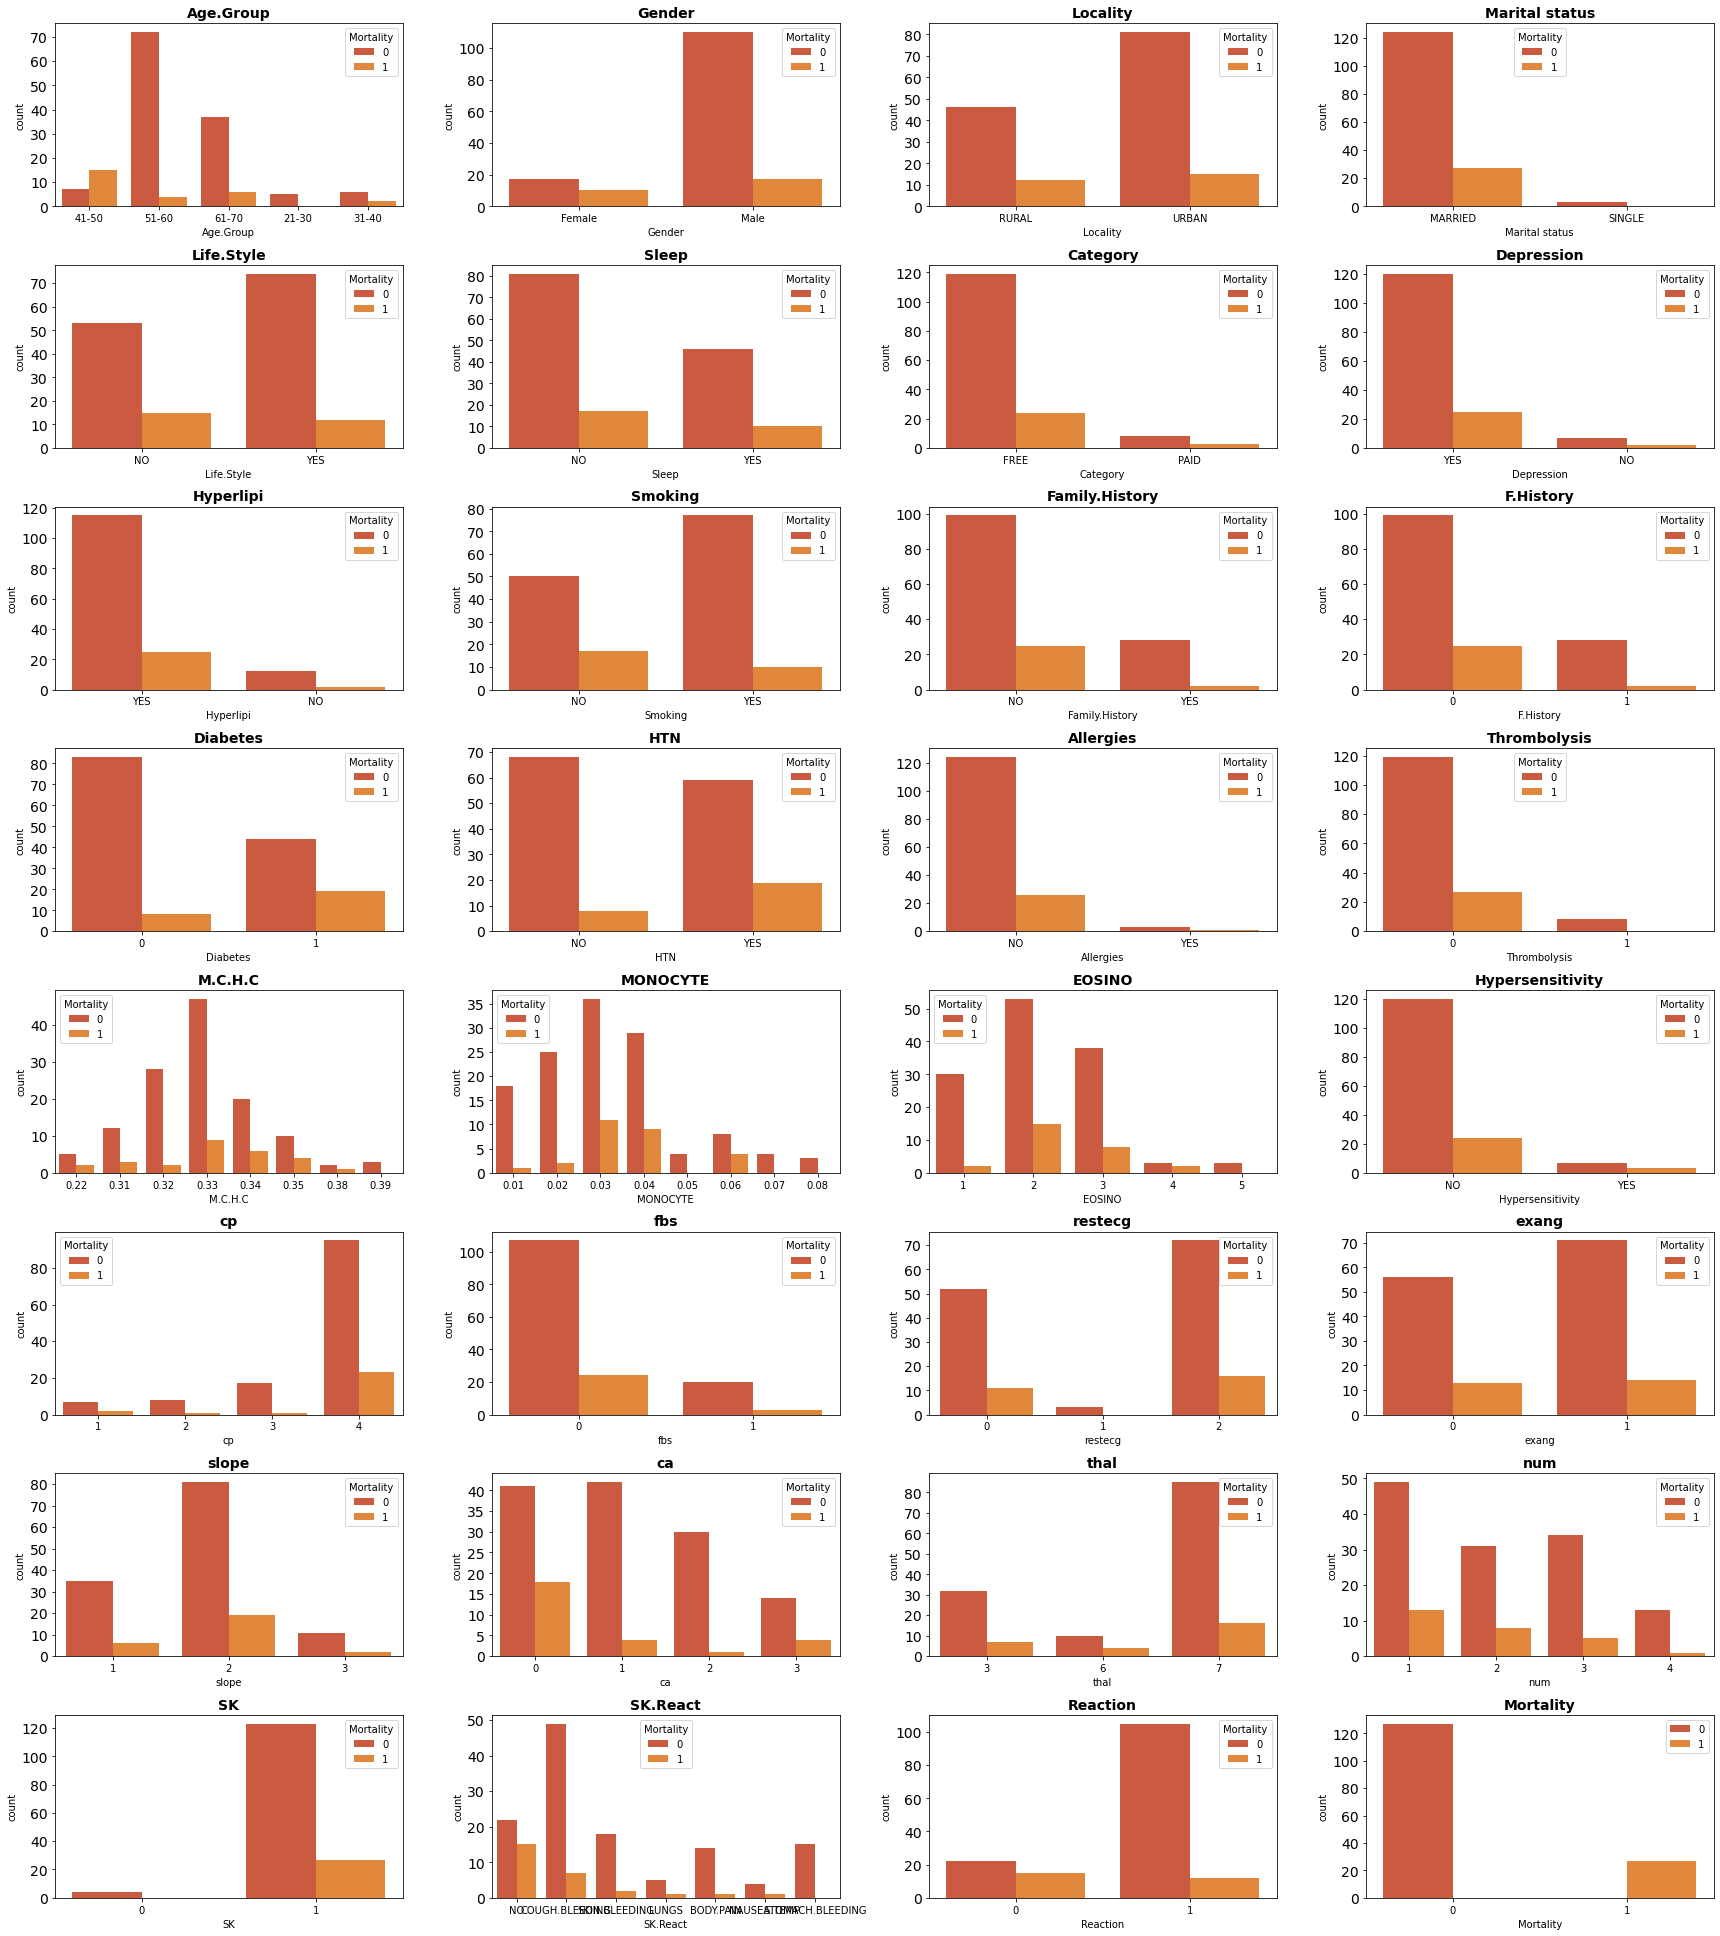

In [ ]:
# relação da coluna Mortality com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Mortality'],ax=ax,palette=color)
    plt.title(col)
    plt.title(col, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Relação de gênero com outras colunas

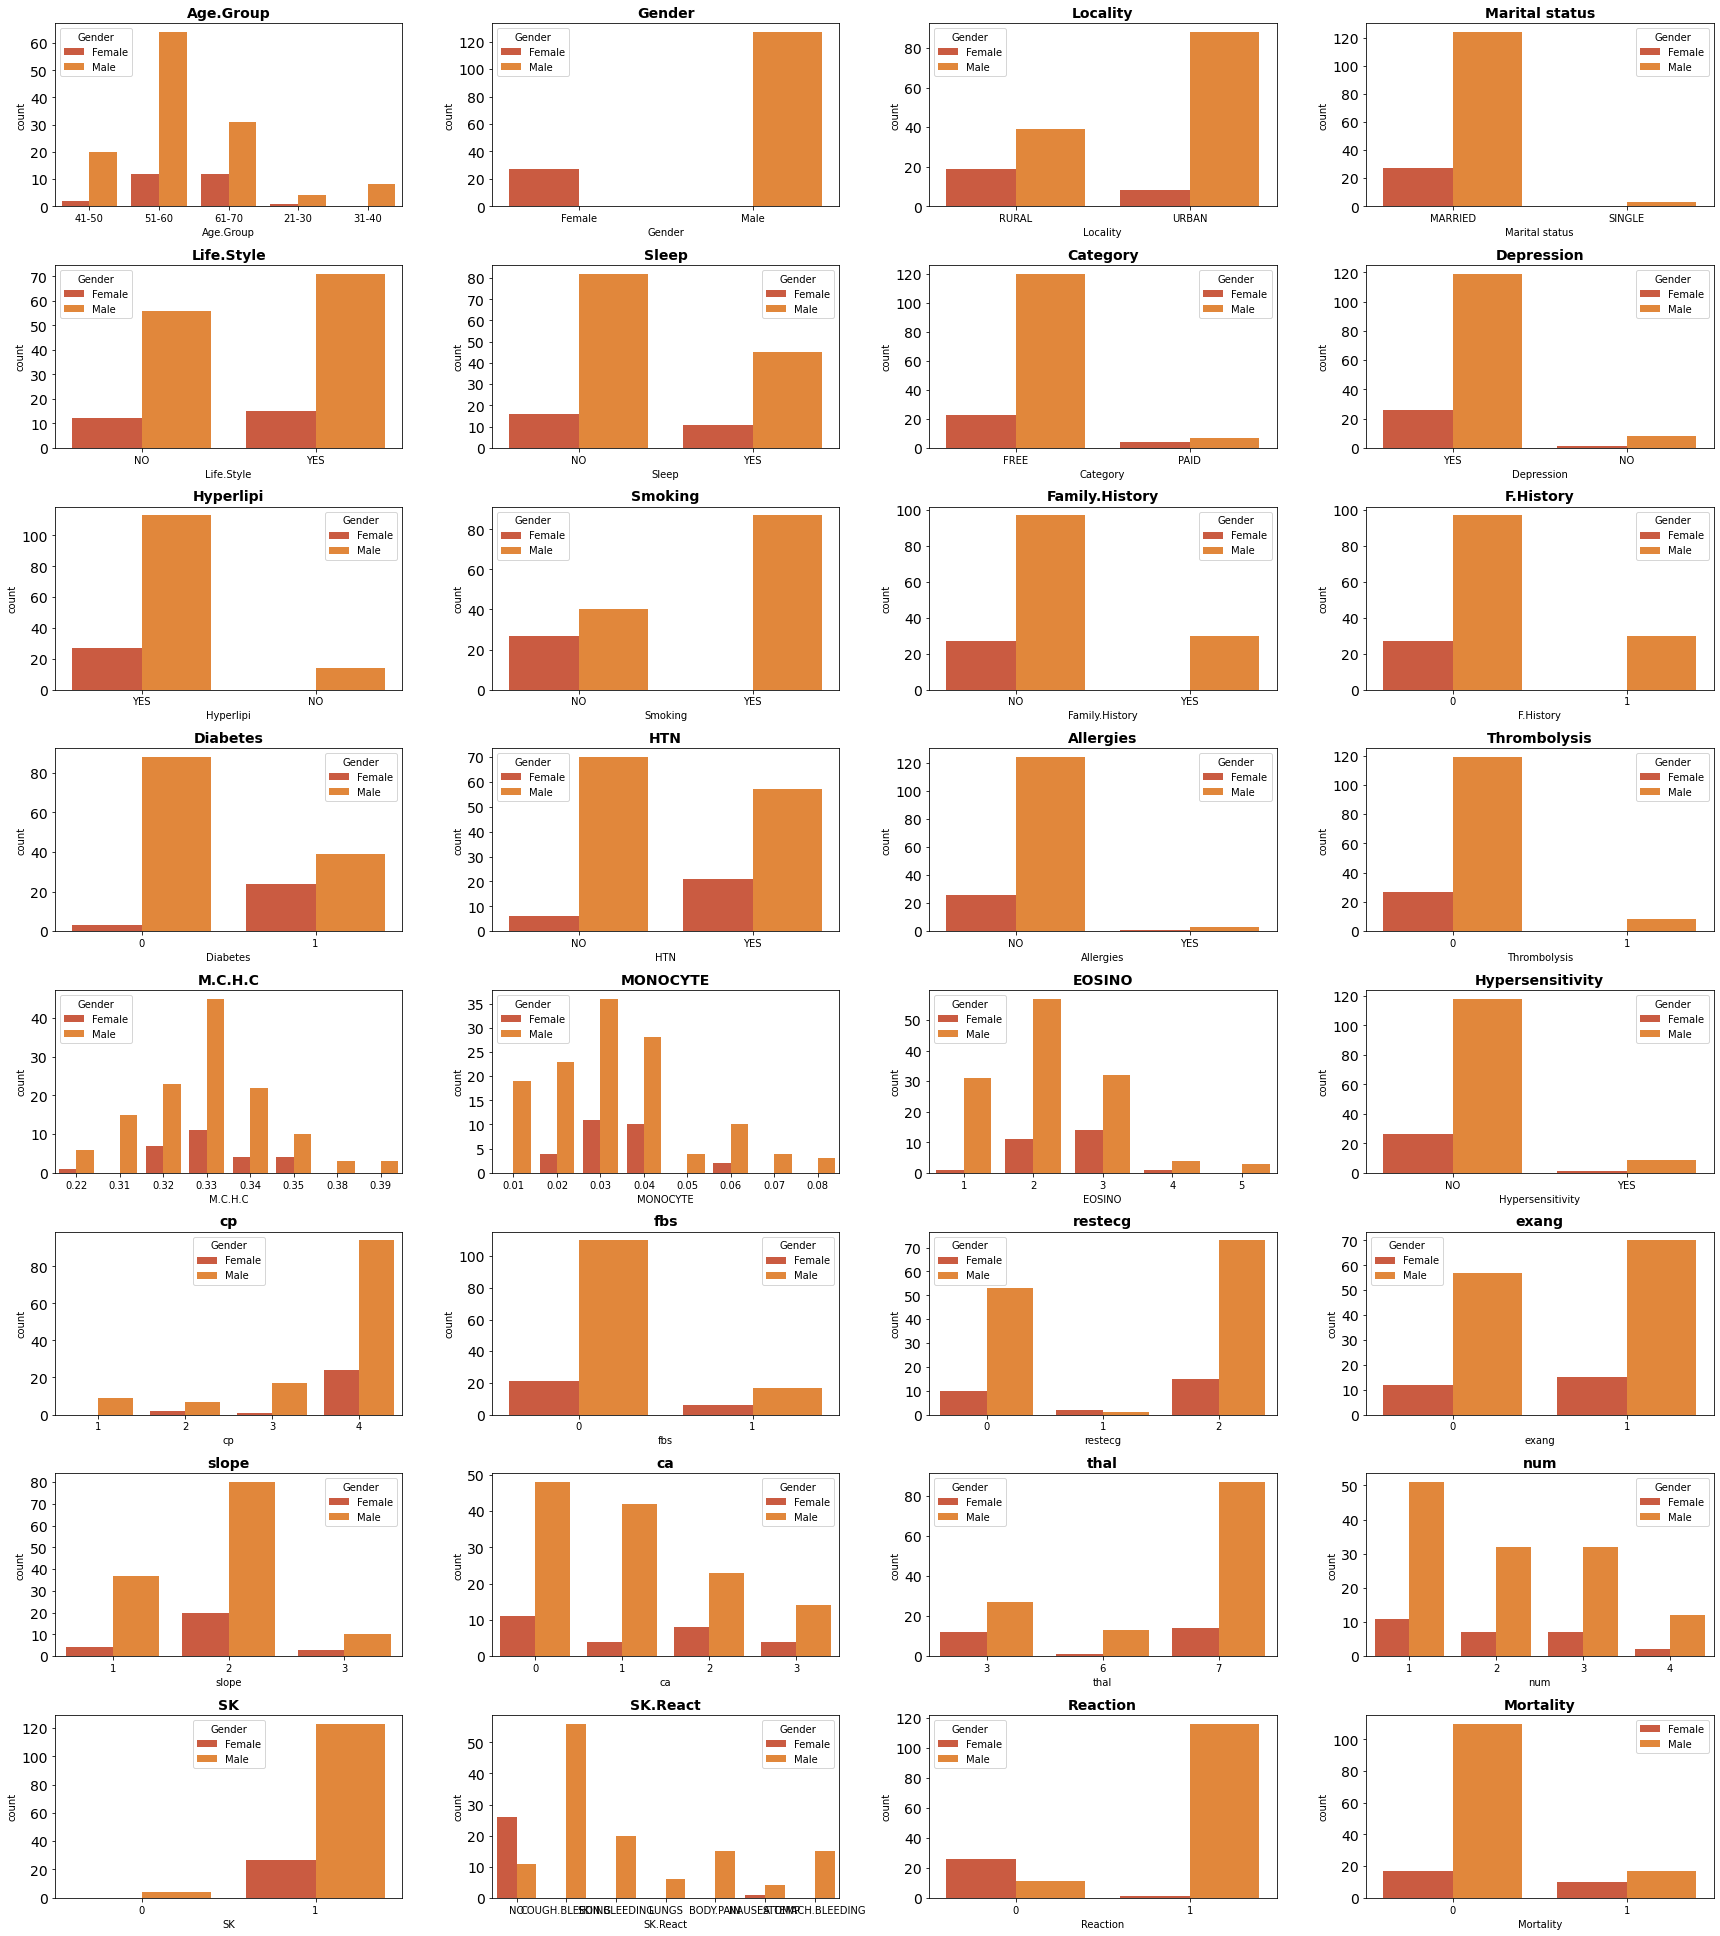

In [ ]:
# Relação de gêneros com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Gender'],ax=ax,palette=color)
    plt.title(col)
    plt.title(col, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Relação de status civil com as outras colunas

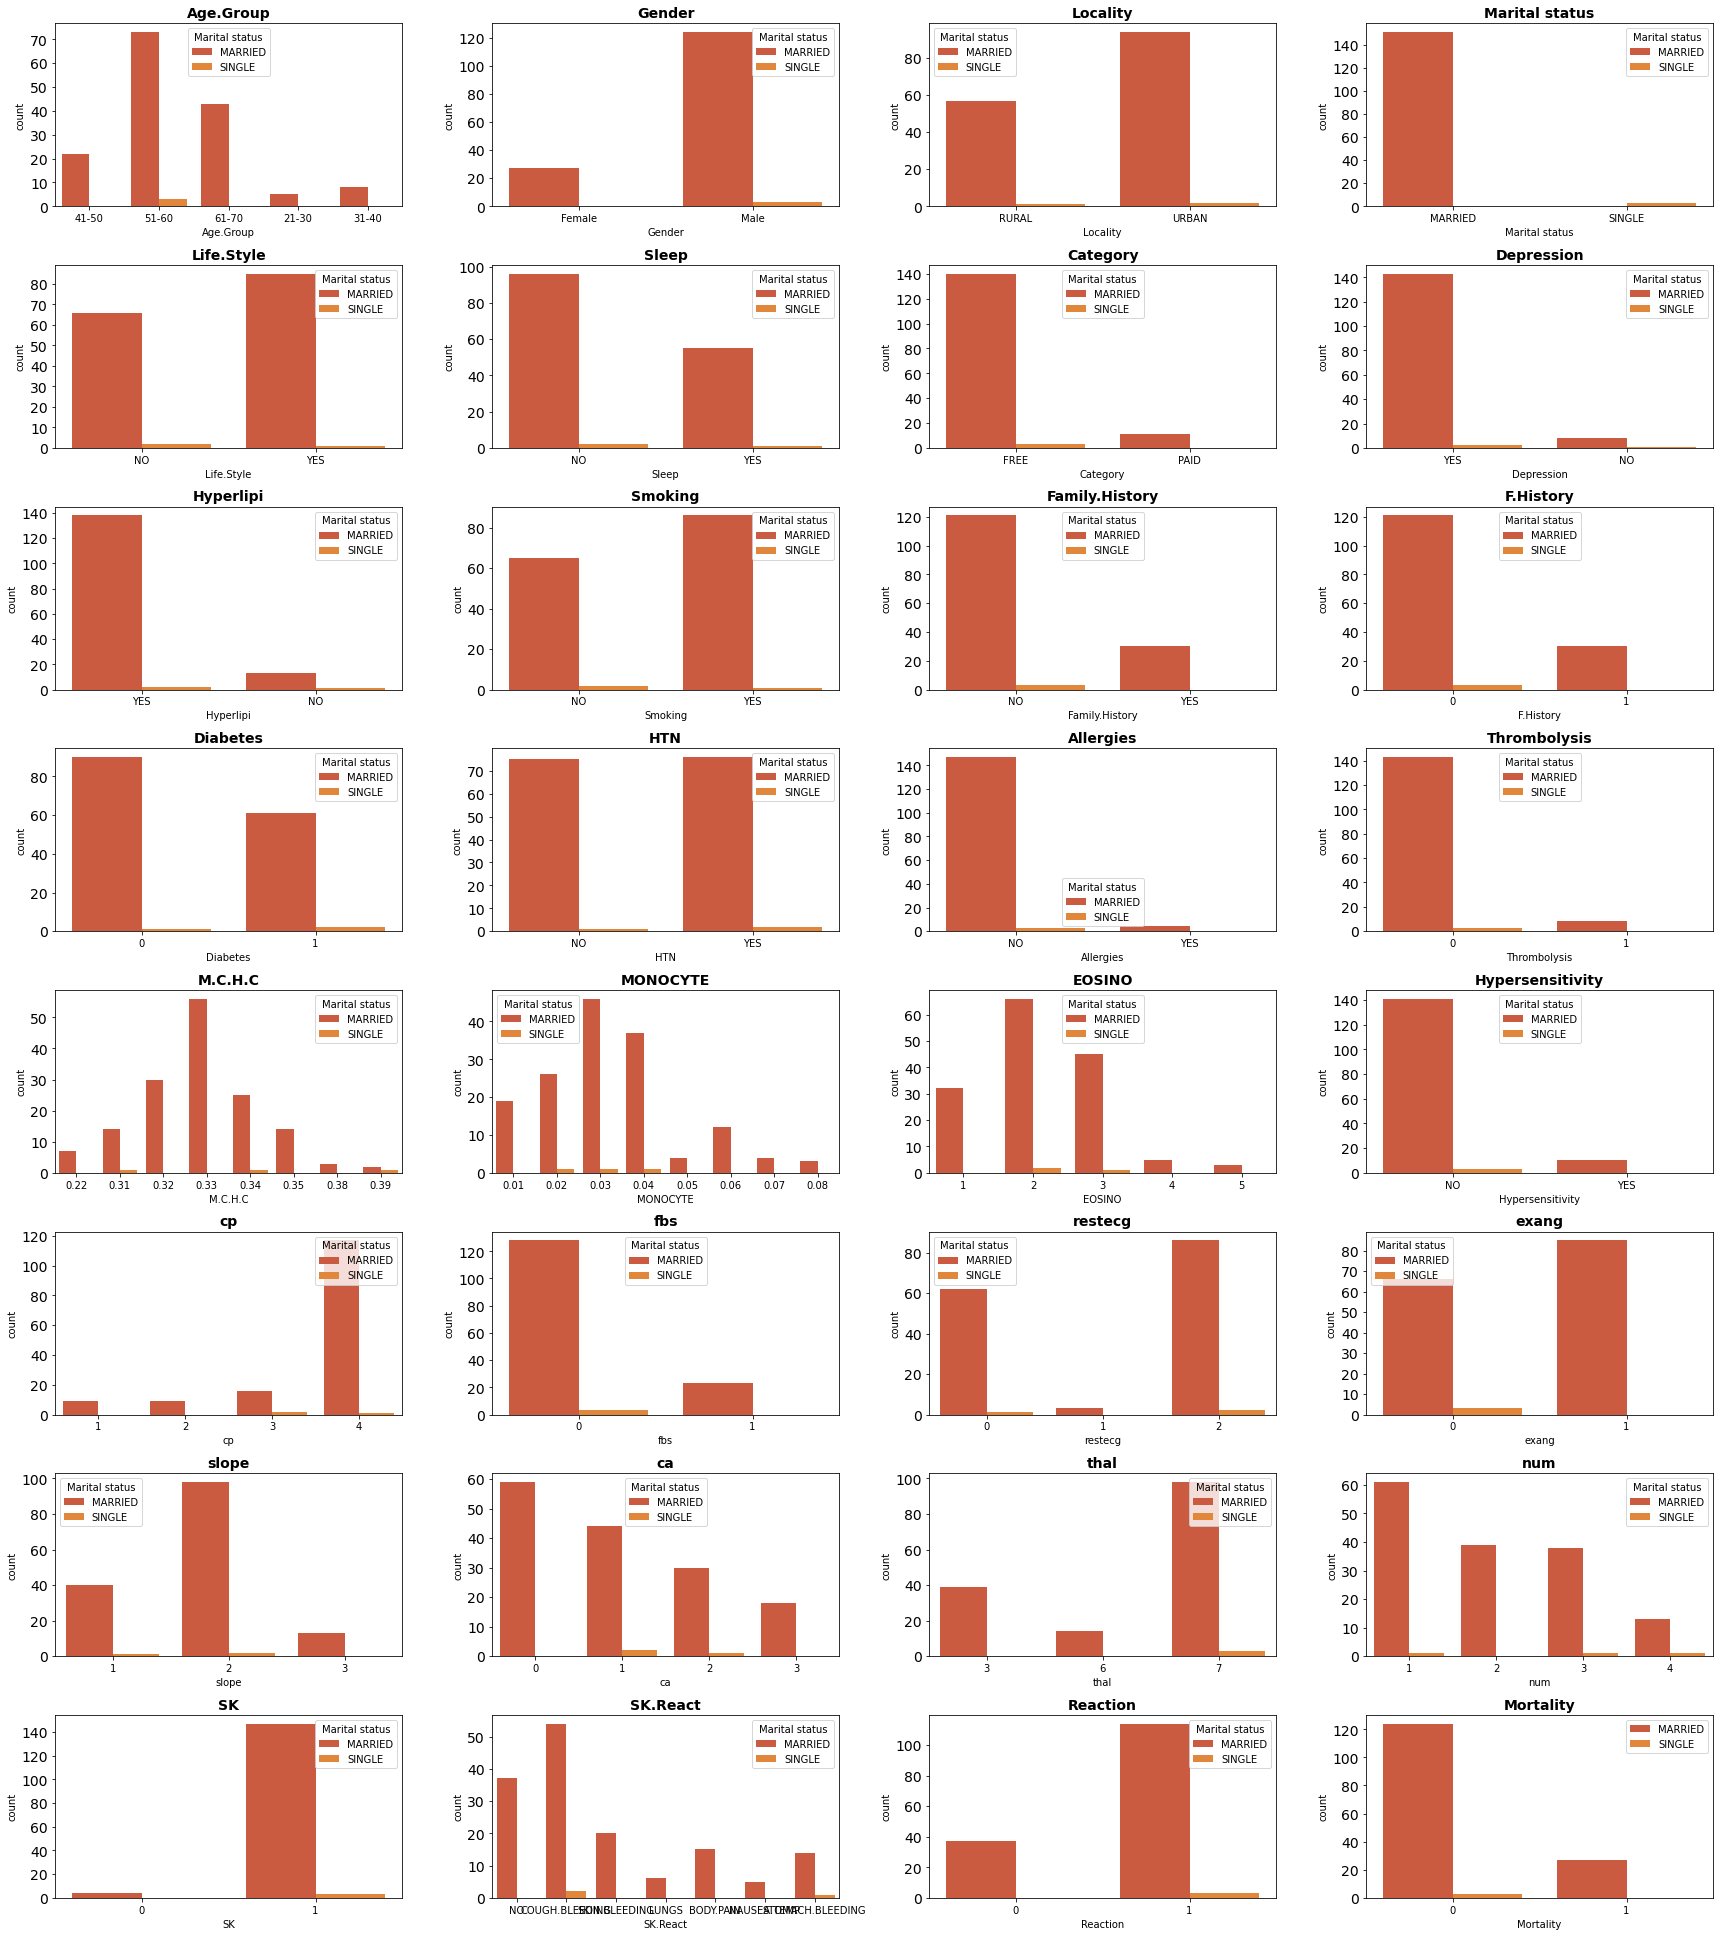

In [ ]:
# Relação de estado civil com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Marital status'],ax=ax,palette=color)
    plt.title(col)
    plt.title(col, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Preparação dos Dados

### Separando os dados para o treino e teste

In [ ]:
y = df.mortality
x = df.drop(['mortality'],axis=1)

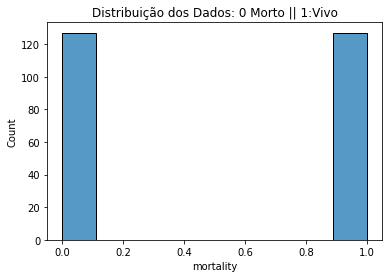

In [ ]:
sns.histplot(x=y)
plt.title('Distribuição dos Dados: 0 Morto || 1:Vivo')
plt.show()

### Dados Desbalanceados

In [ ]:
## Usando o pipeline entre o over e under sampler para balancear os dados x e y
from imblearn.pipeline import Pipeline

under = RandomUnderSampler()
over = RandomOverSampler()

pipeline = Pipeline(steps=[('o',over),('u', under)])

## com scaler
x, y = pipeline.fit_resample(x, y)

### Treinamento do X e Y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,age,age.group,gender,locality,marital status,life.style,sleep,category,depression,hyperlipi,...,thalach,exang,oldpeak,slope,ca,thal,num,sk,reaction,follow.up
38,52,3,0,0,1,1,1,1,1,1,...,160,0,0.0,1,1,3,1,1,1,32
143,45,2,0,1,1,1,0,1,1,1,...,125,1,1.8,2,0,6,2,1,1,7
84,60,3,0,1,1,1,0,1,1,1,...,144,1,1.4,1,1,7,1,1,1,7
55,56,3,0,0,1,0,0,1,1,1,...,103,1,1.6,3,0,7,2,1,1,15
218,38,1,0,1,1,1,1,1,1,1,...,140,0,1.2,2,0,7,3,1,1,15


In [ ]:
x_train.shape

(203, 55)

## Features Importances

In [ ]:
grade = GradientBoostingClassifier(random_state=42)

grade.fit(x,y)
colunas = []
value = []
for i, col in enumerate(df.drop('mortality',axis=1)):
  #print('{} | {}'.format(col, grade.feature_importances_[i] * 100))

  colunas.append(col)
  value.append(grade.feature_importances_[i])
pasta = zip(colunas, value)
feature = pd.DataFrame(pasta, columns=['Colunas','Valores'])

In [ ]:
feature = feature[feature['Valores'] != 0.0]
colunas = feature['Colunas'].unique()

In [ ]:
feature

,Colunas,Valores
0,age,3.794124e-01
1,age.group,3.866569e-03
2,gender,6.901912e-02
3,locality,4.420940e-04
6,sleep,1.494317e-04
7,category,8.308806e-04
8,depression,3.542716e-06
13,diabetes,9.591985e-03
14,htn,3.731886e-05
16,bp,6.817371e-03


## Padronizando os conjuntos de treino e teste

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[0.60869565, 0.75      , 0.        , ..., 1.        , 1.        ,
        0.52542373],
       [0.45652174, 0.5       , 0.        , ..., 1.        , 1.        ,
        0.10169492],
       [0.7826087 , 0.75      , 0.        , ..., 1.        , 1.        ,
        0.10169492],
       ...,
       [0.80434783, 1.        , 0.        , ..., 1.        , 1.        ,
        0.81355932],
       [0.56521739, 0.5       , 0.        , ..., 1.        , 1.        ,
        0.86440678],
       [0.86956522, 1.        , 0.        , ..., 1.        , 1.        ,
        0.52542373]])

In [ ]:
y_train.value_counts()

0    104
1     99
Name: mortality, dtype: int64

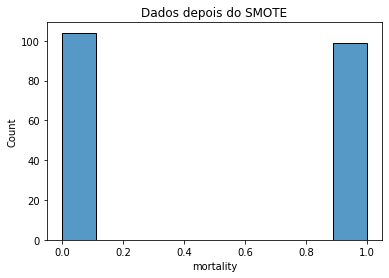

In [ ]:
sns.histplot(x=y_train)
plt.title('Dados depois do SMOTE')
plt.show()

# Modelos de Classificação

### Random Forest

In [ ]:
forest =  RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=forest, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 80}

In [ ]:
forest =  RandomForestClassifier(max_depth=5, n_estimators=70, max_features=3, random_state=42)
forest.fit(x_train, y_train)

y_pred_tf = forest.predict(x_train)
y_pred_f = forest.predict(x_test)

print('Train Score:', forest.score(x_train, y_train))
print('Test Score:',forest.score(x_test, y_test))

Train Score: 0.9802955665024631
Test Score: 0.8627450980392157


In [ ]:
forest =  RandomForestClassifier(max_depth=7, n_estimators=50, max_features=4, random_state=42)
forest.fit(x_train, y_train)

y_pred_tf = forest.predict(x_train)
y_pred_f = forest.predict(x_test)

print('Train Score:', forest.score(x_train, y_train))
print('Test Score:',forest.score(x_test, y_test))

Train Score: 0.9901477832512315
Test Score: 0.9019607843137255


In [ ]:
cm_forest = confusion_matrix(y_test, forest.predict(x_test))
cm_norm_forest = cm_forest / cm_forest.sum(axis=1)
cm_norm_forest

array([[0.91304348, 0.07142857],
       [0.13043478, 0.89285714]])

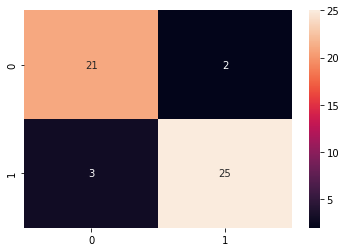

In [ ]:
## Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_forest, annot=True)

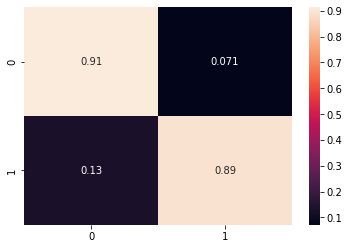

In [ ]:
## Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_forest, annot=True)

### Extra Trees

In [ ]:
extra = ExtraTreesClassifier(random_state=42)
params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=extra, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 80}

In [ ]:
extra = ExtraTreesClassifier(max_depth=6, n_estimators=80, max_features=2, random_state=42)
extra.fit(x_train, y_train)

y_pred_te = extra.predict(x_train)
y_pred_f = extra.predict(x_test)
y_proba_e = extra.predict_proba(x_train)
Y_proba = extra.predict_proba(x_test)

print('Train Score:', extra.score(x_train, y_train))
print('Test Score:',extra.score(x_test, y_test))

Train Score: 0.9852216748768473
Test Score: 0.7058823529411765


In [ ]:
extra = ExtraTreesClassifier(max_depth=8, n_estimators=300, max_features=4, random_state=42)
extra.fit(x_train, y_train)

y_pred_te = extra.predict(x_train)
y_pred_f = extra.predict(x_test)

print('Train Score:', extra.score(x_train, y_train))
print('Test Score:',extra.score(x_test, y_test))

Train Score: 1.0
Test Score: 0.9803921568627451


In [ ]:
cm_extra = confusion_matrix(y_test, extra.predict(x_test))
cm_norm_extra = cm_extra / cm_extra.sum(axis=1)
cm_norm_extra

array([[0.95652174, 0.03571429],
       [0.        , 1.        ]])

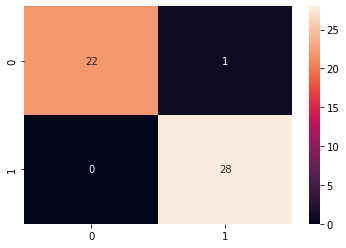

In [ ]:
# Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_extra, annot=True)

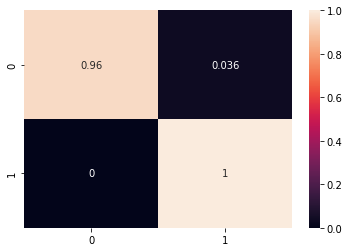

In [ ]:
# Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_extra, annot=True)

### Gradient Boosting

In [ ]:
grade = GradientBoostingClassifier(random_state=42)
params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=grade, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 300}

In [ ]:
grade = GradientBoostingClassifier(max_depth=7, n_estimators=200, max_features=4, random_state=42)
grade.fit(x_train, y_train)

y_pred_tg = grade.predict(x_train)
y_pred_g = grade.predict(x_test)
y_proba_g = grade.predict_proba(x_train)
y_proba = grade.predict_proba(x_test)

print('Train Score:', grade.score(x_train, y_train))
print('Test Score:',grade.score(x_test, y_test))

Train Score: 1.0
Test Score: 0.9215686274509803


In [ ]:
cm_grade = confusion_matrix(y_test, grade.predict(x_test))
cm_norm_grade = cm_grade / cm_grade.sum(axis=1)
cm_norm_grade

array([[0.95652174, 0.03571429],
       [0.13043478, 0.89285714]])

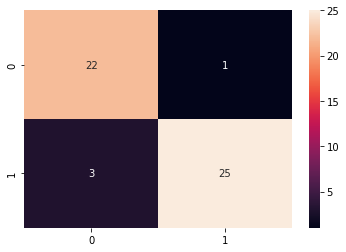

In [ ]:
# Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_grade, annot=True)

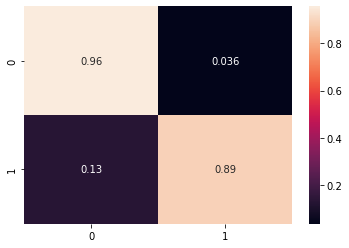

In [ ]:
##  Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_grade, annot=True)

# Conjunto de dados novo com a previsão

In [ ]:
list(y_proba_g)

### Criando um dataframe com os conjuntos de treino e teste

In [ ]:
# criando tabela com o conjunto de treino
new = pd.DataFrame(x_train, columns=x.columns)
new['Mortality'] = y_train.values
new['Predictions'] = y_pred_tg
new['Probability'] = list(y_proba_g)

# criando tabela com o conjunto de teste
new1 = pd.DataFrame(x_test, columns=x.columns)
new1['Mortality'] = y_test
new1['Predictions'] = y_pred_g
new1['Probability'] = list(y_proba)

# juntando os novos conjuntos de dados
final = pd.concat([new, new1], ignore_index=True)

print(new.shape)
print(new1.shape)
print(final.shape)

(203, 58)
(51, 58)
(254, 58)


In [ ]:
final.head()

,age,age.group,gender,locality,marital status,life.style,sleep,category,depression,hyperlipi,...,slope,ca,thal,num,sk,reaction,follow.up,Mortality,Predictions,Probability
0,0.608696,0.75,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.333333,0.00,0.000000,1.0,1.0,0.525424,0.0,0,"[0.9999999301861189, 6.98138810949569e-08]"
1,0.456522,0.50,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.5,0.000000,0.75,0.333333,1.0,1.0,0.101695,1.0,1,"[1.1455393433834615e-07, 0.9999998854460657]"
2,0.782609,0.75,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.333333,1.00,0.000000,1.0,1.0,0.101695,0.0,0,"[0.9999997992194646, 2.007805354485982e-07]"
3,0.695652,0.75,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.000000,1.00,0.333333,1.0,1.0,0.237288,0.0,0,"[0.9999999131045287, 8.689547129375842e-08]"
4,0.304348,0.25,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,0.000000,1.00,0.666667,1.0,1.0,0.237288,1.0,1,"[3.702714623798897e-08, 0.9999999629728538]"


### Mesclagem

In [ ]:
new_data = dados.merge(final[['Predictions','Probability']], left_index=True, right_index=True)
new_data.head(10)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up,Predictions,Probability
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,0,7,2,1,NO,0,0,60,0,"[0.9999999301861189, 6.98138810949569e-08]"
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0,7,2,1,NO,0,0,15,1,"[1.1455393433834615e-07, 0.9999998854460657]"
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,0,3,2,1,NO,0,0,6,0,"[0.9999997992194646, 2.007805354485982e-07]"
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,1,7,3,1,NO,0,0,52,0,"[0.9999999131045287, 8.689547129375842e-08]"
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2,7,3,1,NO,0,0,34,1,"[3.702714623798897e-08, 0.9999999629728538]"
5,56,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2,7,2,1,NO,0,1,32,0,"[0.9999999872673012, 1.2732698789208546e-08]"
6,57,51-60,Female,RURAL,MARRIED,YES,YES,PAID,YES,YES,...,0,7,1,1,NO,0,0,60,1,"[8.360490821868183e-08, 0.9999999163950918]"
7,57,51-60,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,1,3,1,1,NO,0,1,3,1,"[1.3029881562598433e-07, 0.9999998697011844]"
8,58,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2,3,3,1,NO,0,0,15,0,"[0.999999936485235, 6.351476499623666e-08]"
9,58,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2,6,2,1,NO,0,0,6,0,"[0.9999999828685666, 1.7131433349817707e-08]"


In [ ]:
print(dados.shape)
print(new_data.shape)

(154, 60)
(154, 62)


### Salvando em csv o novo conjunto de dados

In [ ]:
#new_data.to_csv('Previsao_Doenca_Cardiaca', index=True)